In [1]:
import pandas as pd

EDA 참조 : https://tech.kakao.com/2020/04/29/kakaoarena-3rd-part2/

In [2]:
df = pd.read_csv('/content/drive/MyDrive/2021_1~6월 멜론차트/melon_chart1.csv')
df

,month,ranking,title,artist,like,lyric,genre,date,rating,vote_count
0,1,1,VVS (Feat. JUSTHIS) (Prod. GroovyRoom),"미란이 (Mirani), 먼치맨(MUNCHMAN), Khundi Panda, 머쉬베...","186,565",보여줘야겠어 내가 망할 거랬던 놈들에게도 내가 잘될 거라 했던 너에게도 다 할게 최...,랩/힙합,2020.11.21,3.9,17116
1,1,2,밤하늘의 별을(2020),경서,"156,404",밤하늘의 별을 따서 너에게 줄래 너는 내가 사랑하니까 더 소중하니까 오직 너 아니면...,발라드,2020.11.14,1.2,28059
2,1,3,Dynamite,방탄소년단,"416,020",Cos ah ah I’m in the stars tonight So watch me...,댄스,2020.08.24,4.0,60557
3,1,4,잠이 오질 않네요,장범준,"142,252",당신은 날 설레게 만들어 조용한 내 마음 자꾸만 춤추게 해 얼마나 얼마나 날 떨리게...,발라드,2020.10.24,4.2,6036
4,1,5,Lovesick Girls,BLACKPINK,"193,633",영원한 밤 창문 없는 방에 우릴 가둔 love What can we say 매번 아...,댄스,2020.10.02,4.1,23390
...,...,...,...,...,...,...,...,...,...,...
295,6,46,아로하,조정석,"221,087",어두운 불빛아래 촛불 하나 와인 잔에 담긴 약속하나 항상 너의 곁에서 널 지켜줄거야...,"발라드, 국내드라마",2020.03.27,3.9,14855
296,6,47,체념,MSG워너비(정상동기),"21,095",행복했어 너와의 시간들 아마도 너는 힘들었겠지 너의 마음을 몰랐던 건 아니야 나도 ...,발라드,2021.05.22,4.1,5534
297,6,48,"모든 날, 모든 순간 (Every day, Every Moment)",폴킴,"371,007",네가 없이 웃을 수 있을까 생각만 해도 눈물이나 힘든 시간 날 지켜준 사람 이제는 ...,"발라드, 국내드라마",2018.03.20,3.9,9375
298,6,49,오래된 노래,스탠딩 에그,"230,071",오래 전에 함께 듣던 노래가 발걸음을 다시 멈춰서게 해 이 거리에서 너를 느낄 수 ...,"인디음악, 포크/블루스",2012.09.04,4.0,4080


In [3]:
import numpy as np

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   month       300 non-null    int64  
 1   ranking     300 non-null    int64  
 2   title       300 non-null    object 
 3   artist      300 non-null    object 
 4   like        300 non-null    object 
 5   lyric       300 non-null    object 
 6   genre       300 non-null    object 
 7   date        300 non-null    object 
 8   rating      300 non-null    float64
 9   vote_count  300 non-null    int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 23.6+ KB


In [5]:
df.isna().sum()

month         0
ranking       0
title         0
artist        0
like          0
lyric         0
genre         0
date          0
rating        0
vote_count    0
dtype: int64

In [6]:
np.unique(df['genre'],return_counts=True)

(array(['R&B/Soul', 'R&B/Soul, 인디음악', '댄스', '랩/힙합', '랩/힙합, 인디음악', '록/메탈',
        '록/메탈, 국내드라마', '발라드', '발라드, 국내드라마', '발라드, 인디음악', '인디음악, 포크/블루스',
        '포크/블루스'], dtype=object),
 array([14,  4, 83, 41,  4, 18,  9, 86, 20, 13,  6,  2]))

In [7]:
df['genre'] = df['genre'].apply(lambda x : '포크/블루스' if '인디음악, 포크/블루스' in x else x)
df['genre'] = df['genre'].apply(lambda x:x if ',' not in x else x[:x.find(',')])
# 음악 종류 중에 ,국내드라마, 인디음악 등 종류가 똑같지만 나뉘어져있는게 있다. # 인디음악 포크/블루스의 경우 포크/블루스로 처리해줘야 되기 때문에 따로 처리해준다.

In [8]:
np.unique(df['genre'],return_counts=True)
# 깔끔하게 처리된 모습이다.

(array(['R&B/Soul', '댄스', '랩/힙합', '록/메탈', '발라드', '포크/블루스'], dtype=object),
 array([ 18,  83,  45,  27, 119,   8]))

In [9]:
df['lyric'][0]

"보여줘야겠어 내가 망할 거랬던 놈들에게도 내가 잘될 거라 했던 너에게도 다 할게 최선 갈아끼워 다 새 거 My life's shining like a VVS VVS 내 삶은 빛나 VVS VVS 보란 듯 나와 TV에 Now you see me babe 내 삶은 빛나 VVS VVS Skrt-skrt Hey new water new vv 난 알바 째고 무대 위 Yeah go get it go get it 가사 위 가난이 빛나지 안 가 무한리필 살아봐야겠어 내 빌딩 Yeah 개 같던 세상의 뒤통수 치러 왔지 더 크게 Callin’ ma name 모두 날 보고 놀래 미란이가 TV에 떼버려 Tag 사 새롭게 Yeah yeah 타고 비행 Skrr skrr 난 올라가 Skrr skrr 난 빛이 나 내가 뭐라 했어 Mom 꺼내겠다고 포차 맨 밑바닥의 소녀 엄마의 술병이 날 만들어 허기져 이를 꽉 물어 Chit chat bout me 덤벼 겁쟁이 너 VVS on ma neck 꿈 앞에 녹슨 팔찌 버려 문 앞에 구제 벨트 아직 허리에 원망하던 과거와 춤출래 인디고 카니발 Skrt-skrt 목숨은 다 꺼내놓고 자판기 밑 먼지 덕지덕지 붙은 동전까지 털어-털어 여기까지 왔지 What you know about me 내 속 이야기 털어놓으려 지갑 털어 차린 술상 위 넌 폰만 바라봤잖아 이제 그 스크린에서 날 봐라 I'ma 먹고서 Fly 너가 나갈 건 삔또지 악플들이 돈과 함께 쏟아지니 Got a nice ring to it 꼬우면 네 오빠인지 아저씨인지한테 일러바치고 한 판 더 뜨자 해 빛이 나는 Solo라니까 뭘 그렇게 재니 다 드루와 내 패기 170에 60kg도 안 되지만 국보 1호 MC The Q's certified new king in the rap 내가 TV에 쬐끔 나왔다고 연예인 된 줄 알았다는 이미 넌 패 Bigger stacks bigger schemes Do bigger thang G+Jus like this team I'm blessed 모든 게 끝나고 홍대로 돌

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
!pip install konlpy

     |████████████████████████████████| 19.4 MB 6.2 MB/s 
     |████████████████████████████████| 448 kB 42.5 MB/s 
     |████████████████████████████████| 86 kB 6.6 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [12]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq
# 한글 파일 설치

Selecting previously unselected package fonts-nanum.
(Reading database ... 160837 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [13]:
genre = np.unique(df['genre'],return_counts=True)

In [14]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

In [15]:
font_path = r'/content/drive/MyDrive/2021_1~6월 멜론차트/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=font_path, size=10)
# 한글이 깨지기 떄문에 한글을 넣어주는 작업
fm._rebuild()

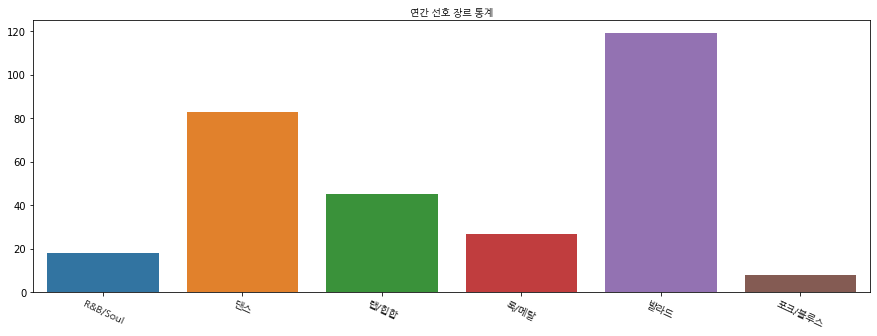

In [16]:
plt.figure(figsize=(15,5))
sns.barplot(x=[i for i in genre[0]],y=[i for i in genre[1]])
plt.xticks(fontproperties=fontprop,rotation=-25)
plt.title('연간 선호 장르 통계',fontproperties=fontprop)

plt.show()

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47017 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 55193 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54633 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_

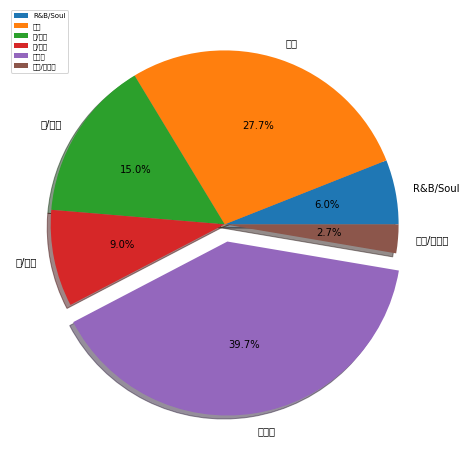

In [17]:
labels = [i for i in genre[0]]
plt.figure(figsize=(8,8))
font_path = '/content/drive/MyDrive/2021_1~6월 멜론차트/NanumGothic.ttf'
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)
plt.pie([i for i in genre[1]],labels=labels,autopct='%.1f%%',shadow=True,explode=(0,0,0,0,0.1,0))
plt.xticks(fontproperties=fontprop)
plt.legend(loc='best',prop={'family':font_name, 'size':7})
plt.show()

In [18]:
genre

(array(['R&B/Soul', '댄스', '랩/힙합', '록/메탈', '발라드', '포크/블루스'], dtype=object),
 array([ 18,  83,  45,  27, 119,   8]))

In [19]:
artist = np.unique(df['artist'],return_counts=True)

In [20]:
artist

(array(['#안녕', '(여자)아이들', '10CM', 'AKMU (악동뮤지션)', 'ASH ISLAND',
        'BLACKPINK', 'ITZY (있지)', 'Khundi Panda',
        'MSG워너비 TOP 8 (별루지, 김정수, 강창모, 정기석, 이동휘, 이상이, 박재정, 원슈타인)',
        'MSG워너비(정상동기)', 'SG 워너비', 'STAYC(스테이씨)', 'TWICE (트와이스)', 'aespa',
        '가호 (Gaho)', '경서', '경서 (경서예지), MJ (써니사이드)', '경서예지', '규현 (KYUHYUN)',
        '노을', '다비치', '라붐 (LABOUM)', '로제 (ROSÉ)', '릴보이 (lIlBOI)',
        '릴보이 (lIlBOI), 원슈타인, Chillin Homie, 스카이민혁 (Skyminhyuk)',
        '마마무 (Mamamoo)', '마크툽 (MAKTUB)', '미란이 (Mirani)',
        '미란이 (Mirani), 먼치맨(MUNCHMAN), Khundi Panda, 머쉬베놈 (MUSHVENOM)',
        '박진영', '방탄소년단', '백지영', '벤', '브레이브걸스', '산들', '선미', '소정 (레이디스 코드)',
        '송이한', '순순희', '스윙스', '스탠딩 에그', '신예영', '아이유', '양요섭, 정은지',
        '오마이걸 (OH MY GIRL)', '오반 (OVAN)', '이예준', '이하이', '임창정', '장범준', '적재',
        '전상근', '정동하', '조이 (JOY)', '조정석', '창모 (CHANGMO)', '케이시 (Kassy)',
        '폴킴', '허각', '헤이즈 (Heize)', '현아', '호미들', '화사 (Hwa Sa)', '환불원정대'],
       dtype=object),
 array([ 4,  2,  4,  6,  3,  9

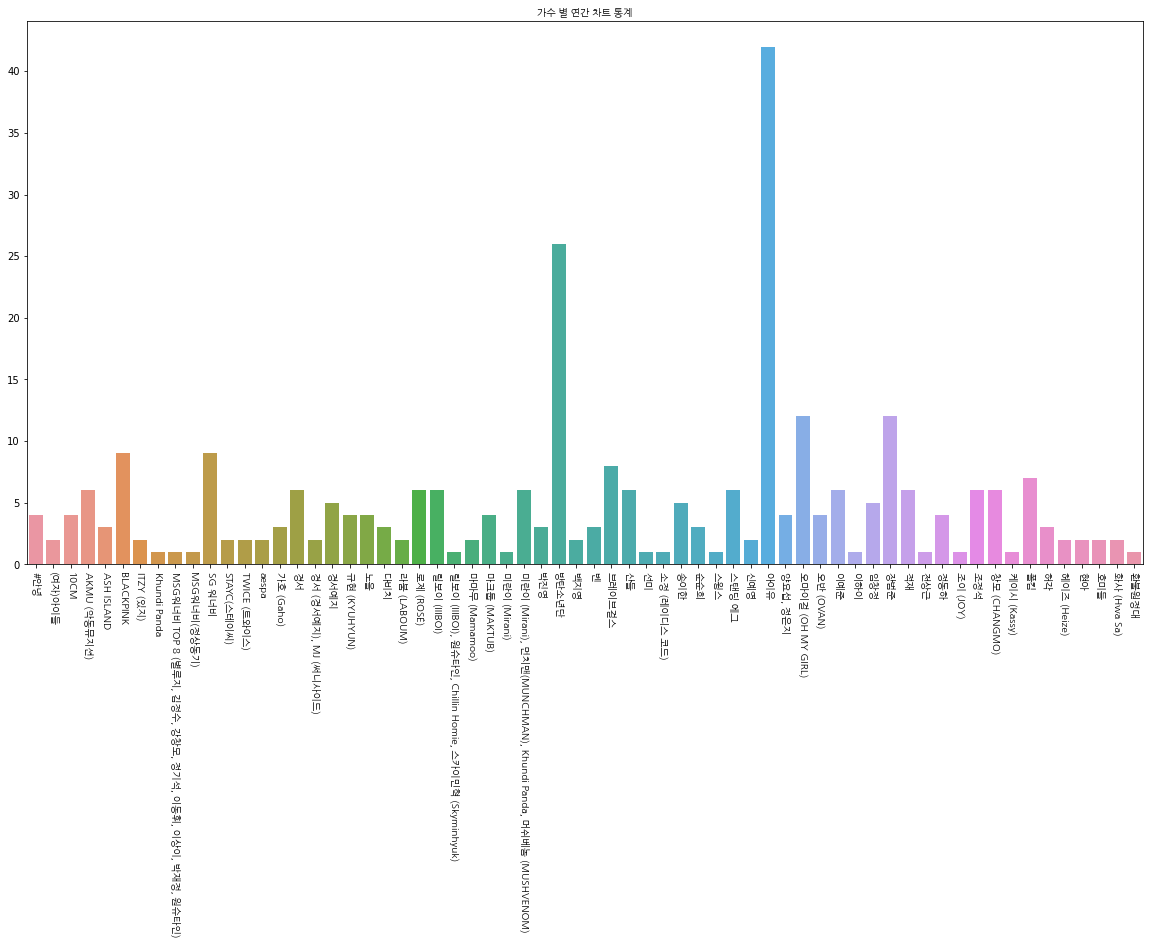

In [21]:
plt.figure(figsize=(20,10))
sns.barplot(x=[i for i in artist[0]],y=[i for i in artist[1]])
plt.xticks(fontproperties=fontprop,rotation=-90)
plt.title('가수 별 연간 차트 통계',fontproperties=fontprop)
plt.show()

In [22]:
df[df['artist']=='아이유']

,month,ranking,title,artist,like,lyric,genre,date,rating,vote_count
11,1,12,에잇(Prod.&Feat. SUGA of BTS),아이유,"362,190",So are you happy now Finally happy now are you...,록/메탈,2020.05.06,4.2,42393
18,1,19,Blueming,아이유,"311,611",‘뭐해?‘라는 두 글자에 ‘네가 보고 싶어’ 나의 속마음을 담아 우 이모티콘 하나하...,록/메탈,2019.11.18,4.6,44441
32,1,33,마음을 드려요,아이유,"210,833",당신에게 드릴 게 없어서 나의 마음을 드려요 그대에게 받은 게 많아서 표현을 다 할...,발라드,2020.02.15,4.3,17538
49,1,50,Celebrity,아이유,"291,545","세상의 모서리 구부정하게 커버린 골칫거리 outsider 걸음걸이, 옷차림, 이어...",댄스,2021.03.25,4.7,40423
50,2,1,Celebrity,아이유,"291,545","세상의 모서리 구부정하게 커버린 골칫거리 outsider 걸음걸이, 옷차림, 이어...",댄스,2021.03.25,4.7,40423
58,2,9,에잇(Prod.&Feat. SUGA of BTS),아이유,"362,190",So are you happy now Finally happy now are you...,록/메탈,2020.05.06,4.2,42393
61,2,12,Blueming,아이유,"311,611",‘뭐해?‘라는 두 글자에 ‘네가 보고 싶어’ 나의 속마음을 담아 우 이모티콘 하나하...,록/메탈,2019.11.18,4.6,44441
65,2,16,내 손을 잡아,아이유,"159,143",느낌이 오잖아 떨리고 있잖아 언제까지 눈치만 볼 거니 네 맘을 말해봐 딴청 ...,발라드,2011.05.25,4.6,7714
84,2,35,마음을 드려요,아이유,"210,833",당신에게 드릴 게 없어서 나의 마음을 드려요 그대에게 받은 게 많아서 표현을 다 할...,발라드,2020.02.15,4.3,17538
97,2,48,Love poem,아이유,"305,873",누구를 위해 누군가 기도하고 있나 봐 숨죽여 쓴 사랑시가 낮게 들리는 듯해 너에...,록/메탈,2019.11.01,4.6,44441


In [23]:
len(df[df['artist']=='아이유'])

42

In [24]:
df['date'] = [df['date'][i][:-3] for i in range(len(df['date']))]
df['like'] = [int((df['like'][i]).replace(',','')) for i in range(len(df['like']))]
df
#출시 날짜를 월까지만 지정해줬음
#month로 월을 잡아줬는데 순위에 월을 적을 필요가 없다 생각하여 삭제 해줬음

,month,ranking,title,artist,like,lyric,genre,date,rating,vote_count
0,1,1,VVS (Feat. JUSTHIS) (Prod. GroovyRoom),"미란이 (Mirani), 먼치맨(MUNCHMAN), Khundi Panda, 머쉬베...",186565,보여줘야겠어 내가 망할 거랬던 놈들에게도 내가 잘될 거라 했던 너에게도 다 할게 최...,랩/힙합,2020.11,3.9,17116
1,1,2,밤하늘의 별을(2020),경서,156404,밤하늘의 별을 따서 너에게 줄래 너는 내가 사랑하니까 더 소중하니까 오직 너 아니면...,발라드,2020.11,1.2,28059
2,1,3,Dynamite,방탄소년단,416020,Cos ah ah I’m in the stars tonight So watch me...,댄스,2020.08,4.0,60557
3,1,4,잠이 오질 않네요,장범준,142252,당신은 날 설레게 만들어 조용한 내 마음 자꾸만 춤추게 해 얼마나 얼마나 날 떨리게...,발라드,2020.10,4.2,6036
4,1,5,Lovesick Girls,BLACKPINK,193633,영원한 밤 창문 없는 방에 우릴 가둔 love What can we say 매번 아...,댄스,2020.10,4.1,23390
...,...,...,...,...,...,...,...,...,...,...
295,6,46,아로하,조정석,221087,어두운 불빛아래 촛불 하나 와인 잔에 담긴 약속하나 항상 너의 곁에서 널 지켜줄거야...,발라드,2020.03,3.9,14855
296,6,47,체념,MSG워너비(정상동기),21095,행복했어 너와의 시간들 아마도 너는 힘들었겠지 너의 마음을 몰랐던 건 아니야 나도 ...,발라드,2021.05,4.1,5534
297,6,48,"모든 날, 모든 순간 (Every day, Every Moment)",폴킴,371007,네가 없이 웃을 수 있을까 생각만 해도 눈물이나 힘든 시간 날 지켜준 사람 이제는 ...,발라드,2018.03,3.9,9375
298,6,49,오래된 노래,스탠딩 에그,230071,오래 전에 함께 듣던 노래가 발걸음을 다시 멈춰서게 해 이 거리에서 너를 느낄 수 ...,포크/블루스,2012.09,4.0,4080


In [25]:
np.unique(df['genre'],return_counts=True)

(array(['R&B/Soul', '댄스', '랩/힙합', '록/메탈', '발라드', '포크/블루스'], dtype=object),
 array([ 18,  83,  45,  27, 119,   8]))

In [26]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df['genre_label'] = lb.fit_transform(df['genre'])
df['artist_label'] = lb.fit_transform(df['artist'])
df['title_label'] = lb.fit_transform(df['title'])

In [27]:
np.unique(df['artist'],return_counts=True)

(array(['#안녕', '(여자)아이들', '10CM', 'AKMU (악동뮤지션)', 'ASH ISLAND',
        'BLACKPINK', 'ITZY (있지)', 'Khundi Panda',
        'MSG워너비 TOP 8 (별루지, 김정수, 강창모, 정기석, 이동휘, 이상이, 박재정, 원슈타인)',
        'MSG워너비(정상동기)', 'SG 워너비', 'STAYC(스테이씨)', 'TWICE (트와이스)', 'aespa',
        '가호 (Gaho)', '경서', '경서 (경서예지), MJ (써니사이드)', '경서예지', '규현 (KYUHYUN)',
        '노을', '다비치', '라붐 (LABOUM)', '로제 (ROSÉ)', '릴보이 (lIlBOI)',
        '릴보이 (lIlBOI), 원슈타인, Chillin Homie, 스카이민혁 (Skyminhyuk)',
        '마마무 (Mamamoo)', '마크툽 (MAKTUB)', '미란이 (Mirani)',
        '미란이 (Mirani), 먼치맨(MUNCHMAN), Khundi Panda, 머쉬베놈 (MUSHVENOM)',
        '박진영', '방탄소년단', '백지영', '벤', '브레이브걸스', '산들', '선미', '소정 (레이디스 코드)',
        '송이한', '순순희', '스윙스', '스탠딩 에그', '신예영', '아이유', '양요섭, 정은지',
        '오마이걸 (OH MY GIRL)', '오반 (OVAN)', '이예준', '이하이', '임창정', '장범준', '적재',
        '전상근', '정동하', '조이 (JOY)', '조정석', '창모 (CHANGMO)', '케이시 (Kassy)',
        '폴킴', '허각', '헤이즈 (Heize)', '현아', '호미들', '화사 (Hwa Sa)', '환불원정대'],
       dtype=object),
 array([ 4,  2,  4,  6,  3,  9

In [28]:
df.describe()

,month,ranking,like,rating,vote_count,genre_label,artist_label,title_label
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,3.500000,25.500000,175408.220000,3.822333,20843.310000,2.566667,32.953333,47.543333
std,1.710679,14.454981,116210.188531,0.964834,22069.416624,1.455777,16.384117,26.960918
min,1.000000,1.000000,21095.000000,1.100000,1250.000000,0.000000,0.000000,0.000000
25%,2.000000,13.000000,80763.750000,3.900000,5875.000000,1.000000,20.750000,25.000000
50%,3.500000,25.500000,156405.000000,4.000000,13197.000000,3.000000,34.000000,48.000000
75%,5.000000,38.000000,230071.000000,4.500000,29390.000000,4.000000,44.000000,72.000000
max,6.000000,50.000000,542977.000000,4.800000,108268.000000,5.000000,63.000000,93.000000


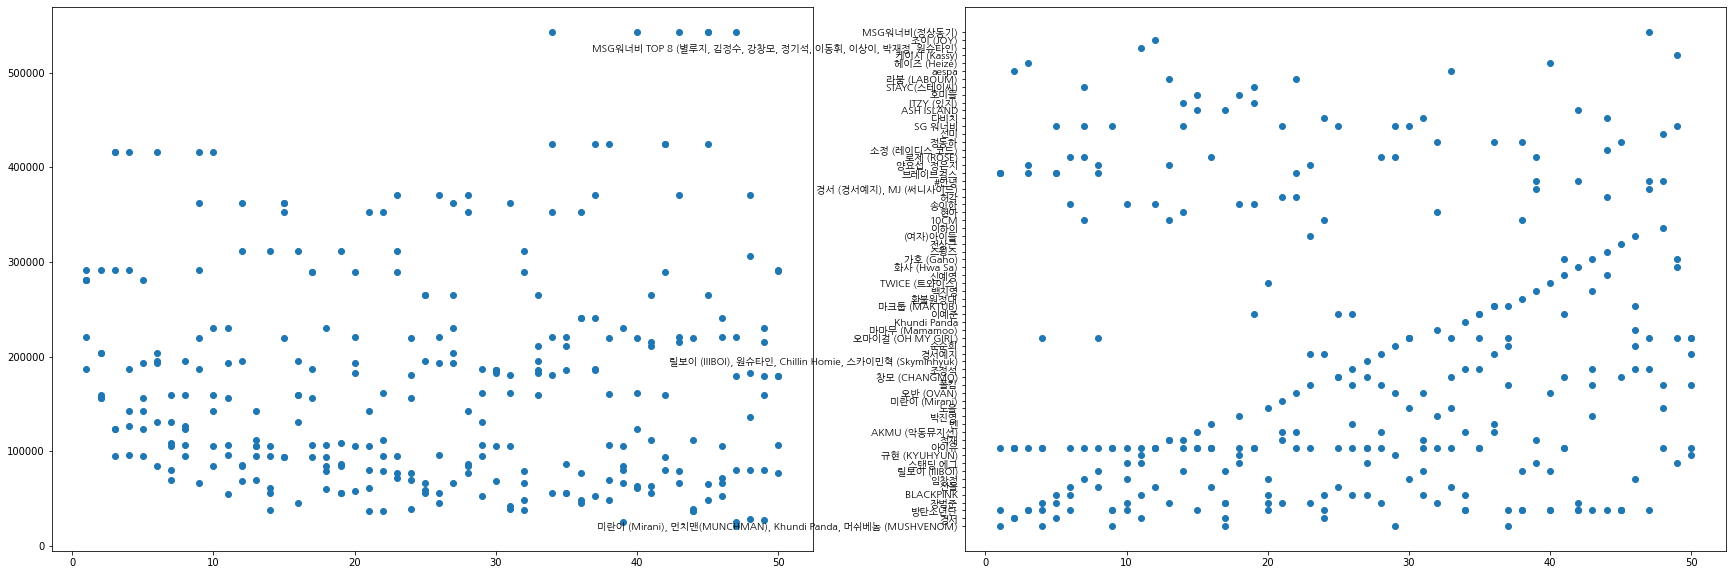

In [29]:
fig,axes = plt.subplots(1,2,figsize=(30,10))
axes[0].scatter(df['ranking'],df['like'])
axes[1].scatter(df['ranking'],df['artist'])
plt.yticks(fontproperties=fontprop)
plt.show()
# like와 등수는 관계가 있을까?
# 가수와 등수는 관계가 있을까?

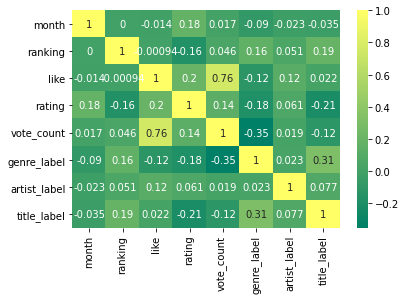

In [30]:
sns.heatmap(df.corr(),cmap='summer',annot=True)
plt.show()
# 상관계수를 봤을 때 상관도가 높으면 feature importance가 높은 경향이 있지만 반드시 비례하지 않기 때문에 확인해봐야하지만
# 상관계수만 봤을 때 무엇을 target으로 잡아도 feature importance가 낮을 것으로 예상된다.
# vote_count feature를 추가해줬을 때 like와 vote_count의 상관관계가 높은 것으로 보인다.

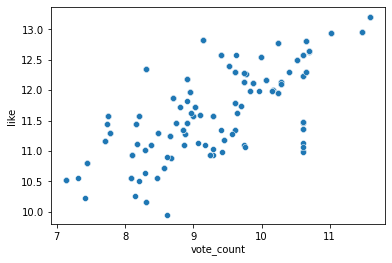

In [31]:
sns.scatterplot(x=np.log1p(df['vote_count']),y=np.log1p(df['like']))
plt.show()

<img src = 'https://img1.daumcdn.net/thumb/R800x0/?scode=mtistory2&fname=http%3A%2F%2Fcfs11.blog.daum.net%2Fimage%2F21%2Fblog%2F2008%2F03%2F30%2F08%2F15%2F47eecd81aaf6d%26filename%3D%EC%82%B0%EC%A0%90%EB%8F%84_%EA%B7%B8%EB%A6%BC.jpg'>

<h1><a href='https://www.inflearn.com/questions/141653'>상관계수와 feature importance 관계</a></h1>

In [32]:
df

,month,ranking,title,artist,like,lyric,genre,date,rating,vote_count,genre_label,artist_label,title_label
0,1,1,VVS (Feat. JUSTHIS) (Prod. GroovyRoom),"미란이 (Mirani), 먼치맨(MUNCHMAN), Khundi Panda, 머쉬베...",186565,보여줘야겠어 내가 망할 거랬던 놈들에게도 내가 잘될 거라 했던 너에게도 다 할게 최...,랩/힙합,2020.11,3.9,17116,2,28,27
1,1,2,밤하늘의 별을(2020),경서,156404,밤하늘의 별을 따서 너에게 줄래 너는 내가 사랑하니까 더 소중하니까 오직 너 아니면...,발라드,2020.11,1.2,28059,4,15,54
2,1,3,Dynamite,방탄소년단,416020,Cos ah ah I’m in the stars tonight So watch me...,댄스,2020.08,4.0,60557,1,30,11
3,1,4,잠이 오질 않네요,장범준,142252,당신은 날 설레게 만들어 조용한 내 마음 자꾸만 춤추게 해 얼마나 얼마나 날 떨리게...,발라드,2020.10,4.2,6036,4,49,82
4,1,5,Lovesick Girls,BLACKPINK,193633,영원한 밤 창문 없는 방에 우릴 가둔 love What can we say 매번 아...,댄스,2020.10,4.1,23390,1,5,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,6,46,아로하,조정석,221087,어두운 불빛아래 촛불 하나 와인 잔에 담긴 약속하나 항상 너의 곁에서 널 지켜줄거야...,발라드,2020.03,3.9,14855,4,54,67
296,6,47,체념,MSG워너비(정상동기),21095,행복했어 너와의 시간들 아마도 너는 힘들었겠지 너의 마음을 몰랐던 건 아니야 나도 ...,발라드,2021.05,4.1,5534,4,9,83
297,6,48,"모든 날, 모든 순간 (Every day, Every Moment)",폴킴,371007,네가 없이 웃을 수 있을까 생각만 해도 눈물이나 힘든 시간 날 지켜준 사람 이제는 ...,발라드,2018.03,3.9,9375,4,57,52
298,6,49,오래된 노래,스탠딩 에그,230071,오래 전에 함께 듣던 노래가 발걸음을 다시 멈춰서게 해 이 거리에서 너를 느낄 수 ...,포크/블루스,2012.09,4.0,4080,5,40,77


In [33]:
X = df.drop(['title','artist','lyric','genre','date','vote_count'],axis=True)
y = np.log1p(df['vote_count'])
# vote_count를 예측해보자.

In [34]:
X['like'] = np.log1p(X['like'])
X

,month,ranking,like,rating,genre_label,artist_label,title_label
0,1,1,12.136540,3.9,2,28,27
1,1,2,11.960204,1.2,4,15,54
2,1,3,12.938491,4.0,1,30,11
3,1,4,11.865362,4.2,4,49,82
4,1,5,12.173725,4.1,1,5,21
...,...,...,...,...,...,...,...
295,6,46,12.306316,3.9,4,54,67
296,6,47,9.956839,4.1,4,9,83
297,6,48,12.823979,3.9,4,57,52
298,6,49,12.346148,4.0,5,40,77


In [35]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

In [36]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

In [37]:
xgb = XGBRegressor()

In [38]:
xgb.fit(X_train,y_train)

[06:29:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [39]:
xgb.score(X_train,y_train)

0.980642642971003

In [40]:
y_pred = xgb.predict(X_test)
y_pred

array([10.700038 ,  8.29875  , 10.677236 ,  8.485213 , 10.177674 ,
       10.599563 ,  7.9084573,  8.564298 ,  9.187425 ,  8.182361 ,
        8.181    ,  9.187425 ,  9.401838 ,  9.067262 , 10.36141  ,
        9.270258 , 10.493043 ,  8.917817 ,  9.952285 ,  9.187425 ,
       10.24651  ,  7.873637 ,  8.831698 , 10.283462 , 10.155375 ,
        9.952285 , 10.688704 ,  9.645738 ,  9.11638  ,  8.494518 ,
        8.795529 , 10.570492 ,  8.978817 , 10.36141  ,  9.637566 ,
        8.812594 ,  9.074905 ,  9.952285 , 11.50735  ,  8.829494 ,
        9.352271 , 10.36141  ,  9.789566 ,  8.485213 ,  9.387756 ,
        8.4240885,  8.178658 ,  8.895963 ,  9.187425 ,  9.497222 ,
        8.023744 ,  7.6665587,  8.7494755,  8.451191 ,  9.44134  ,
        9.676326 , 10.77475  ,  8.335764 ,  9.598062 ,  9.592154 ,
       10.215249 ,  8.782807 ,  8.782807 ,  8.829494 ,  8.216246 ,
        8.675516 ,  9.387756 ,  9.351401 ,  8.086695 ,  9.387756 ,
        9.748817 , 10.811196 ,  7.8961263,  7.191172 , 10.3281

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


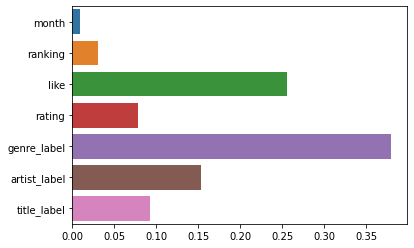

In [41]:
sns.barplot(xgb.feature_importances_,X.columns)
plt.show()
#like가 가장 높게 나오고 뒤를 이어 genre, artist가 중요도가 높게 나온다.

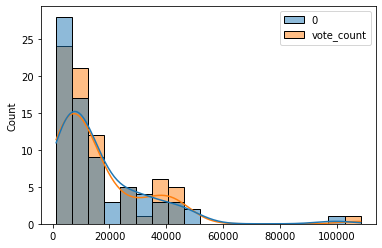

In [42]:
sns.histplot([np.exp(y_pred),np.exp(y_test)],kde=True)
plt.show()
#데이터의 분포로 봤을 때 비슷한 걸로 봐서 어느정도 잘 맞추는 거 같다.

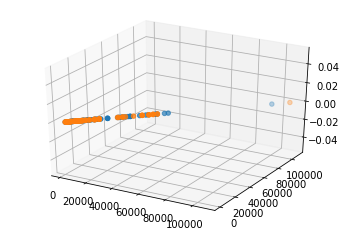

In [43]:
ax = plt.gca(projection='3d')
ax.scatter(np.exp(y_pred),np.exp(y_pred))
ax.scatter(np.exp(y_test),np.exp(y_test))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


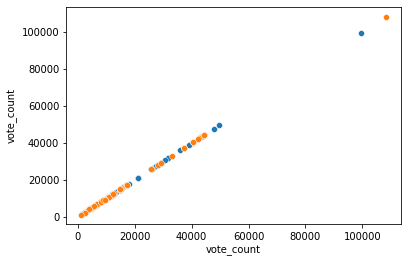

In [44]:
sns.scatterplot(np.exp(y_pred),np.exp(y_pred))
sns.scatterplot(np.exp(y_test),np.exp(y_test))
plt.show()

In [45]:
np.unique(df['date'],return_counts=True)

(array(['2004.01', '2005.03', '2006.11', '2008.04', '2011.05', '2012.09',
        '2016.04', '2017.02', '2017.03', '2018.03', '2018.10', '2019.04',
        '2019.06', '2019.08', '2019.09', '2019.11', '2020.02', '2020.03',
        '2020.04', '2020.05', '2020.06', '2020.07', '2020.08', '2020.10',
        '2020.11', '2020.12', '2021.01', '2021.02', '2021.03', '2021.04',
        '2021.05', '2021.06'], dtype=object),
 array([ 3,  1,  2,  3,  5,  6,  2,  6,  4,  6,  1,  6,  4,  6,  6, 23,  6,
        10, 15,  9,  6,  9, 16, 27, 19, 23, 14,  8, 33,  8, 11,  2]))

In [46]:
date = np.unique(df['date'],return_counts=True)

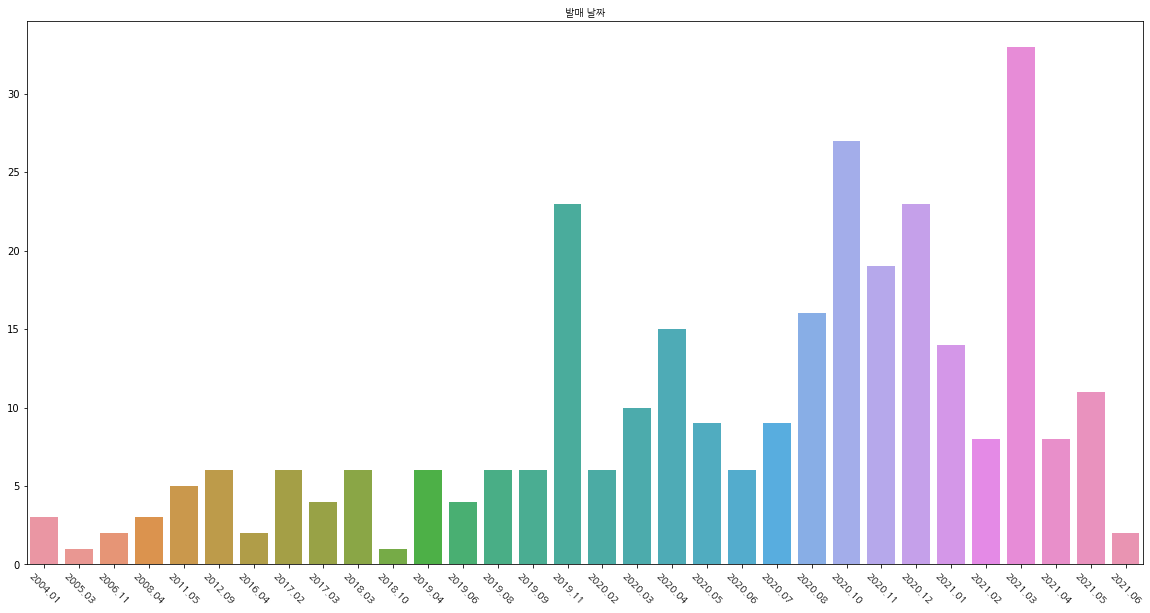

In [47]:
plt.figure(figsize=(20,10))
sns.barplot(x=[i for i in date[0]],y=[i for i in date[1]])
plt.xticks(fontproperties=fontprop,rotation=-45)
plt.title('발매 날짜',fontproperties=fontprop)
plt.show()
# 2021년 1~5월 순위를 검색했는데 생각보다 옛날 노래의 빈도가 많다.

In [48]:
df[df['date']<'2019.11']

,month,ranking,title,artist,like,lyric,genre,date,rating,vote_count,genre_label,artist_label,title_label
9,1,10,오래된 노래,스탠딩 에그,230071,오래 전에 함께 듣던 노래가 발걸음을 다시 멈춰서게 해 이 거리에서 너를 느낄 수 ...,포크/블루스,2012.09,4.0,4080,5,40,77
14,1,15,"어떻게 이별까지 사랑하겠어, 널 사랑하는 거지",AKMU (악동뮤지션),353296,일부러 몇 발자국 물러나 내가 없이 혼자 걷는 널 바라본다 옆자리 허전한 너의 풍경...,발라드,2019.09,4.7,28013,4,3,71
16,1,17,흔들리는 꽃들 속에서 네 샴푸향이 느껴진거야,장범준,289686,흔들리는 꽃들 속에서 네 샴푸향이 느껴진거야 스쳐지나간건가 뒤돌아보지만 그냥 사람들...,록/메탈,2019.08,4.0,12229,3,49,92
22,1,23,"모든 날, 모든 순간 (Every day, Every Moment)",폴킴,371006,네가 없이 웃을 수 있을까 생각만 해도 눈물이나 힘든 시간 날 지켜준 사람 이제는 ...,발라드,2018.03,3.9,9375,4,57,52
35,1,36,오늘도 빛나는 너에게 (To You My Light) (Feat.이라온),마크툽 (MAKTUB),240446,별빛이 내린 밤 그 풍경 속 너와 나 날 새롭게 하는 따뜻하게 만드는 니 눈빛 니 ...,R&B/Soul,2019.06,3.1,13695,0,26,76
...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,6,36,"어떻게 이별까지 사랑하겠어, 널 사랑하는 거지",AKMU (악동뮤지션),353296,일부러 몇 발자국 물러나 내가 없이 혼자 걷는 널 바라본다 옆자리 허전한 너의 풍경...,발라드,2019.09,4.7,28013,4,3,71
291,6,42,흔들리는 꽃들 속에서 네 샴푸향이 느껴진거야,장범준,289685,흔들리는 꽃들 속에서 네 샴푸향이 느껴진거야 스쳐지나간건가 뒤돌아보지만 그냥 사람들...,록/메탈,2019.08,4.0,12229,3,49,92
292,6,43,봄날,방탄소년단,542977,보고 싶다 이렇게 말하니까 더 보고 싶다 너희 사진을 보고 있어도 보고 싶다 너무 ...,랩/힙합,2017.02,3.9,108268,2,30,56
297,6,48,"모든 날, 모든 순간 (Every day, Every Moment)",폴킴,371007,네가 없이 웃을 수 있을까 생각만 해도 눈물이나 힘든 시간 날 지켜준 사람 이제는 ...,발라드,2018.03,3.9,9375,4,57,52


In [49]:
from collections import Counter
temp = [df['date'][i][:-3] for i in range(len(df['date']))]
bins = [2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021]
cuts = pd.cut(temp,bins)
cuts

[(2019, 2020], (2019, 2020], (2019, 2020], (2019, 2020], (2019, 2020], ..., (2019, 2020], (2020, 2021], (2017, 2018], (2011, 2012], (2019, 2020]]
Length: 300
Categories (17, interval[int64]): [(2004, 2005] < (2005, 2006] < (2006, 2007] < (2007, 2008] < ... <
                                   (2017, 2018] < (2018, 2019] < (2019, 2020] < (2020, 2021]]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


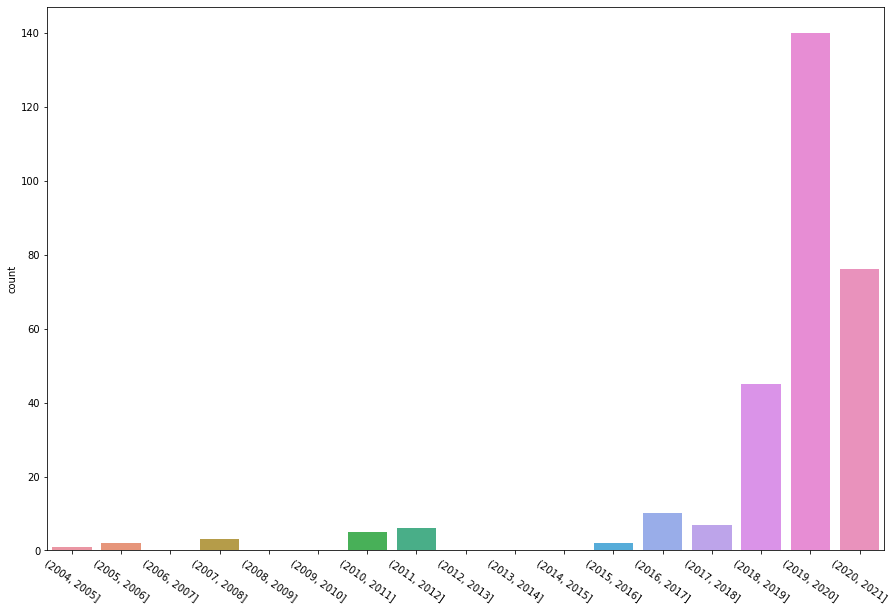

In [50]:
plt.figure(figsize=(15,10))
sns.countplot(cuts)
plt.xticks(rotation=-35)
plt.show()
#2021년차트 2019~2020년 사이의 노래가 가장 비중이 높다.

In [51]:
temp = [df['date'][i][:-3] for i in range(len(df['date']))]
Counter(temp)

Counter({'2004': 3,
         '2005': 1,
         '2006': 2,
         '2008': 3,
         '2011': 5,
         '2012': 6,
         '2016': 2,
         '2017': 10,
         '2018': 7,
         '2019': 45,
         '2020': 140,
         '2021': 76})

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


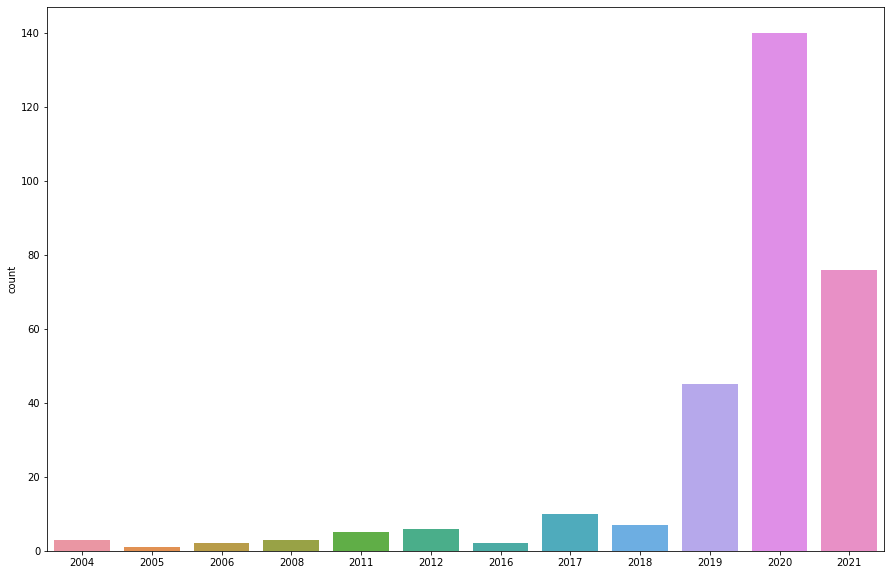

In [52]:
plt.figure(figsize=(15,10))
sns.countplot(sorted(temp))
plt.show()

In [53]:
Counter(temp)

Counter({'2004': 3,
         '2005': 1,
         '2006': 2,
         '2008': 3,
         '2011': 5,
         '2012': 6,
         '2016': 2,
         '2017': 10,
         '2018': 7,
         '2019': 45,
         '2020': 140,
         '2021': 76})

In [54]:
df[df['ranking']<=10]

,month,ranking,title,artist,like,lyric,genre,date,rating,vote_count,genre_label,artist_label,title_label
0,1,1,VVS (Feat. JUSTHIS) (Prod. GroovyRoom),"미란이 (Mirani), 먼치맨(MUNCHMAN), Khundi Panda, 머쉬베...",186565,보여줘야겠어 내가 망할 거랬던 놈들에게도 내가 잘될 거라 했던 너에게도 다 할게 최...,랩/힙합,2020.11,3.9,17116,2,28,27
1,1,2,밤하늘의 별을(2020),경서,156404,밤하늘의 별을 따서 너에게 줄래 너는 내가 사랑하니까 더 소중하니까 오직 너 아니면...,발라드,2020.11,1.2,28059,4,15,54
2,1,3,Dynamite,방탄소년단,416020,Cos ah ah I’m in the stars tonight So watch me...,댄스,2020.08,4.0,60557,1,30,11
3,1,4,잠이 오질 않네요,장범준,142252,당신은 날 설레게 만들어 조용한 내 마음 자꾸만 춤추게 해 얼마나 얼마나 날 떨리게...,발라드,2020.10,4.2,6036,4,49,82
4,1,5,Lovesick Girls,BLACKPINK,193633,영원한 밤 창문 없는 방에 우릴 가둔 love What can we say 매번 아...,댄스,2020.10,4.1,23390,1,5,21
5,1,6,취기를 빌려 (취향저격 그녀 X 산들),산들,195040,언제부턴가 불쑥 내 습관이 돼버린 너 혹시나 이런 맘이 어쩌면 부담일까 널 주저했어...,발라드,2020.07,4.0,7351,4,34,85
6,1,7,힘든 건 사랑이 아니다,임창정,105807,내가 널 떠났어야 했는데 왜 떠나야 하는지도 아는데 어떤 아무 말도 아무것도 줄 게...,발라드,2020.10,4.0,8064,4,48,93
7,1,8,"내일이 오면 (Feat. 기리보이, BIG Naughty (서동현))",릴보이 (lIlBOI),107176,See I just wanna share the vibe with ya 우리가 10...,랩/힙합,2020.12,4.5,10807,2,23,38
8,1,9,Life Goes On,방탄소년단,219960,어느 날 세상이 멈췄어 아무런 예고도 하나 없이 봄은 기다림을 몰라서 눈치 없이 와...,랩/힙합,2020.11,4.4,42522,2,30,19
9,1,10,오래된 노래,스탠딩 에그,230071,오래 전에 함께 듣던 노래가 발걸음을 다시 멈춰서게 해 이 거리에서 너를 느낄 수 ...,포크/블루스,2012.09,4.0,4080,5,40,77


In [55]:
np.unique(df[df['ranking']<=10]['genre'],return_counts=True)

(array(['R&B/Soul', '댄스', '랩/힙합', '록/메탈', '발라드', '포크/블루스'], dtype=object),
 array([ 5, 30,  5,  3, 16,  1]))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


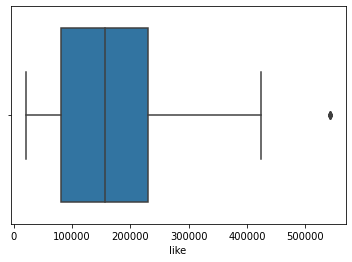

In [56]:
sns.boxplot(df['like'])
plt.show()

In [57]:
df[df['like']>500000]

,month,ranking,title,artist,like,lyric,genre,date,rating,vote_count,genre_label,artist_label,title_label
46,1,47,봄날,방탄소년단,542969,보고 싶다 이렇게 말하니까 더 보고 싶다 너희 사진을 보고 있어도 보고 싶다 너무 ...,랩/힙합,2017.02,3.9,108267,2,30,56
94,2,45,봄날,방탄소년단,542970,보고 싶다 이렇게 말하니까 더 보고 싶다 너희 사진을 보고 있어도 보고 싶다 너무 ...,랩/힙합,2017.02,3.9,108267,2,30,56
139,3,40,봄날,방탄소년단,542970,보고 싶다 이렇게 말하니까 더 보고 싶다 너희 사진을 보고 있어도 보고 싶다 너무 ...,랩/힙합,2017.02,3.9,108267,2,30,56
183,4,34,봄날,방탄소년단,542972,보고 싶다 이렇게 말하니까 더 보고 싶다 너희 사진을 보고 있어도 보고 싶다 너무 ...,랩/힙합,2017.02,3.9,108268,2,30,56
244,5,45,봄날,방탄소년단,542975,보고 싶다 이렇게 말하니까 더 보고 싶다 너희 사진을 보고 있어도 보고 싶다 너무 ...,랩/힙합,2017.02,3.9,108268,2,30,56
292,6,43,봄날,방탄소년단,542977,보고 싶다 이렇게 말하니까 더 보고 싶다 너희 사진을 보고 있어도 보고 싶다 너무 ...,랩/힙합,2017.02,3.9,108268,2,30,56


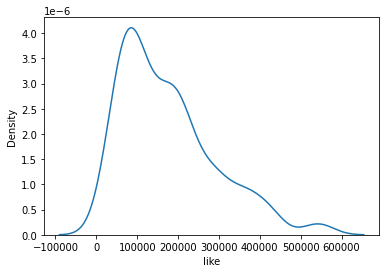

In [58]:
sns.kdeplot(df['like'])
plt.show()

<img src='https://www.researchgate.net/profile/Marco_Faria/publication/294890337/figure/fig5/AS:668873900716049@1536483373457/a-Negative-skewness-b-Normal-curve-c-Positive-skewness-Durkhure-and-Lodwal-2014.ppm'>

In [59]:
df

,month,ranking,title,artist,like,lyric,genre,date,rating,vote_count,genre_label,artist_label,title_label
0,1,1,VVS (Feat. JUSTHIS) (Prod. GroovyRoom),"미란이 (Mirani), 먼치맨(MUNCHMAN), Khundi Panda, 머쉬베...",186565,보여줘야겠어 내가 망할 거랬던 놈들에게도 내가 잘될 거라 했던 너에게도 다 할게 최...,랩/힙합,2020.11,3.9,17116,2,28,27
1,1,2,밤하늘의 별을(2020),경서,156404,밤하늘의 별을 따서 너에게 줄래 너는 내가 사랑하니까 더 소중하니까 오직 너 아니면...,발라드,2020.11,1.2,28059,4,15,54
2,1,3,Dynamite,방탄소년단,416020,Cos ah ah I’m in the stars tonight So watch me...,댄스,2020.08,4.0,60557,1,30,11
3,1,4,잠이 오질 않네요,장범준,142252,당신은 날 설레게 만들어 조용한 내 마음 자꾸만 춤추게 해 얼마나 얼마나 날 떨리게...,발라드,2020.10,4.2,6036,4,49,82
4,1,5,Lovesick Girls,BLACKPINK,193633,영원한 밤 창문 없는 방에 우릴 가둔 love What can we say 매번 아...,댄스,2020.10,4.1,23390,1,5,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,6,46,아로하,조정석,221087,어두운 불빛아래 촛불 하나 와인 잔에 담긴 약속하나 항상 너의 곁에서 널 지켜줄거야...,발라드,2020.03,3.9,14855,4,54,67
296,6,47,체념,MSG워너비(정상동기),21095,행복했어 너와의 시간들 아마도 너는 힘들었겠지 너의 마음을 몰랐던 건 아니야 나도 ...,발라드,2021.05,4.1,5534,4,9,83
297,6,48,"모든 날, 모든 순간 (Every day, Every Moment)",폴킴,371007,네가 없이 웃을 수 있을까 생각만 해도 눈물이나 힘든 시간 날 지켜준 사람 이제는 ...,발라드,2018.03,3.9,9375,4,57,52
298,6,49,오래된 노래,스탠딩 에그,230071,오래 전에 함께 듣던 노래가 발걸음을 다시 멈춰서게 해 이 거리에서 너를 느낄 수 ...,포크/블루스,2012.09,4.0,4080,5,40,77


In [60]:
temp_count_1 = pd.DataFrame(list(Counter(df[df['month']==1]['genre']).items()),columns=['genre','count'])
temp_count_2 = pd.DataFrame(list(Counter(df[df['month']==2]['genre']).items()),columns=['genre','count'])
temp_count_3 = pd.DataFrame(list(Counter(df[df['month']==3]['genre']).items()),columns=['genre','count'])
temp_count_4 = pd.DataFrame(list(Counter(df[df['month']==4]['genre']).items()),columns=['genre','count'])
temp_count_5 = pd.DataFrame(list(Counter(df[df['month']==5]['genre']).items()),columns=['genre','count'])
temp_count_6 = pd.DataFrame(list(Counter(df[df['month']==6]['genre']).items()),columns=['genre','count'])

In [61]:
temp_count_1['month'] = 1 
temp_count_2['month'] = 2
temp_count_3['month'] = 3
temp_count_4['month'] = 4
temp_count_5['month'] = 5
temp_count_6['month'] = 6

In [62]:
temp_count_1

,genre,count,month
0,랩/힙합,12,1
1,발라드,18,1
2,댄스,13,1
3,포크/블루스,1,1
4,록/메탈,4,1
5,R&B/Soul,2,1


In [63]:
Counter(df[df['month']==6]['genre'])

Counter({'R&B/Soul': 4,
         '댄스': 19,
         '랩/힙합': 7,
         '록/메탈': 5,
         '발라드': 14,
         '포크/블루스': 1})

In [64]:
time_concat = pd.concat([temp_count_1,temp_count_2,temp_count_3,temp_count_4,temp_count_5,temp_count_6],axis=0)
time_concat

,genre,count,month
0,랩/힙합,12,1
1,발라드,18,1
2,댄스,13,1
3,포크/블루스,1,1
4,록/메탈,4,1
5,R&B/Soul,2,1
0,댄스,12,2
1,발라드,23,2
2,랩/힙합,7,2
3,록/메탈,5,2


In [65]:
list(set(df['genre']))

['록/메탈', '랩/힙합', '포크/블루스', '발라드', 'R&B/Soul', '댄스']

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47017 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 55193 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54633 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48156 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46972 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46300 missing from current font.
  font.set_

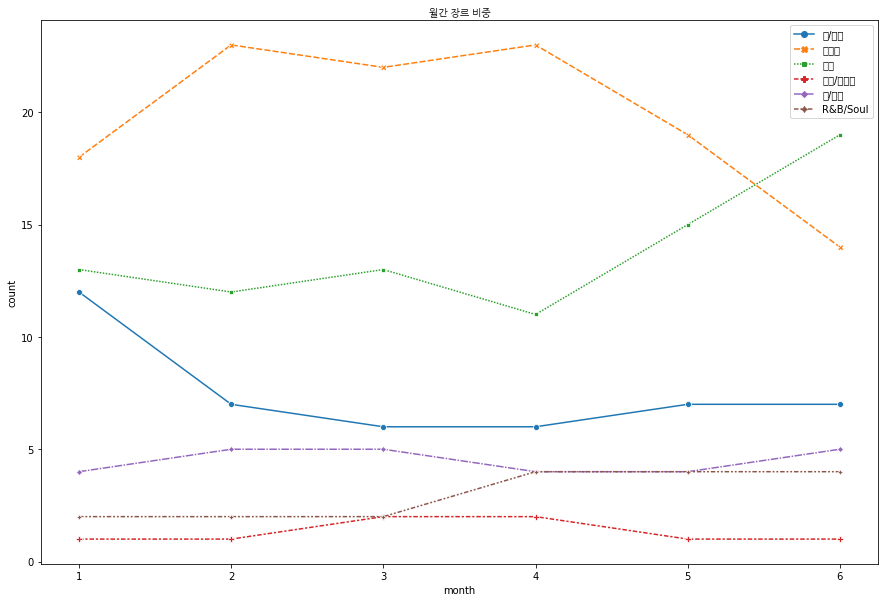

In [66]:
from matplotlib import font_manager, rc

plt.figure(figsize=(15,10))
font_path = '/content/drive/MyDrive/2021_1~6월 멜론차트/NanumGothic.ttf'
font_name = fm.FontProperties(fname=font_path).get_name()
sns.lineplot(data=time_concat,x = 'month', y = 'count',hue='genre',style='genre',markers=True)
plt.title('월간 장르 비중',fontproperties=fontprop)
plt.legend(loc='best')
plt.legend(prop={'family':font_name, 'size':10})
plt.show()

In [67]:
from konlpy.tag import Kkma

In [68]:
Kkma = Kkma()

In [69]:
Kkma.nouns(df['lyric'][0])

['겠어',
 '내가',
 '망',
 '거',
 '거랬',
 '랬',
 '놈',
 '나',
 '너',
 '최선',
 '내',
 '삶',
 '빛',
 '듯',
 '난',
 '알바',
 '무대',
 '위',
 '가사',
 '가난',
 '무한',
 '무한리필',
 '리필',
 '내',
 '빌딩',
 '개',
 '세상',
 '뒤통수',
 '모두',
 '날',
 '미란',
 '떼',
 '타고',
 '비행',
 '뭐',
 '포차',
 '맨',
 '밑',
 '밑바닥',
 '바닥',
 '소녀',
 '엄마',
 '술병',
 '이',
 '겁쟁이',
 '꿈',
 '앞',
 '팔찌',
 '문',
 '구제',
 '벨트',
 '허리',
 '원망',
 '과거',
 '인디고',
 '카니발',
 '목숨',
 '자판기',
 '먼지',
 '동전',
 '털',
 '여기',
 '속',
 '이야기',
 '지갑',
 '술상',
 '폰',
 '스크린',
 '지',
 '악플들',
 '돈',
 '오빠',
 '아저씨',
 '아저씨인지',
 '인지',
 '판',
 '라니',
 '무엇',
 '루',
 '패기',
 '170',
 '60',
 '국보',
 '1',
 '1호',
 '호',
 '연예인',
 '줄',
 '패',
 '홍',
 '가도',
 '건',
 '치',
 '치맨',
 '복근',
 '장착',
 '행동',
 '위험',
 '심의',
 '자체',
 '발광',
 '계속',
 '실시',
 '바',
 '땀',
 '명품',
 '고개',
 '걱정',
 '내일',
 '11',
 '11명',
 '명',
 '매일',
 '역시나',
 '일',
 '때',
 '사랑',
 '형',
 '미련',
 '안',
 '노래',
 '전방',
 '1분간',
 '분간',
 '함성',
 '발사',
 '기',
 '발포',
 '에너지',
 '에너지파',
 '파',
 '수직',
 '수직상승',
 '상승',
 '텐션',
 '도레미',
 '도레미파',
 '대',
 '주변',
 '응원',
 '말',
 '특별',
 '라면',
 '파도',
 '작업실',
 '거리

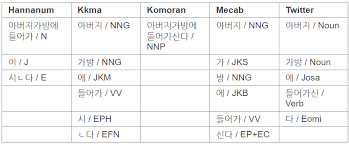

<h1>위의 표를 보면 NNG가 일반 명사를 담당하고 있는데 이를 활용하여 NNG만 뽑아 출력해보자</h1>

In [70]:
temp = Kkma.pos(df['lyric'][0])
for i in temp:
  if i[1] == 'NNG' or i[1] == 'NNP':
    print(i[0])

# 단어가 한 글자일 때는 삶,빛,멋등 의미있는 단어도 있지만 의미없는 단어가 더 많기에 삭제해주는 작업을 추가적으로 한 글자는 삭제 해준다.

내가
망
놈
최선
삶
빛
삶
빛
난
알바
무대
위
가사
위
가난
무한
리필
내
빌딩
세상
뒤통수
모두
날
미란
떼
타고
비행
빛
포차
맨
밑
바닥
소녀
엄마
술병
날
이
겁쟁이
꿈
앞
팔찌
문
앞
구제
벨트
허리
원망
과거
인디고
카니발
목숨
자판기
밑
먼지
동전
털
내
속
이야기
지갑
술상
위
폰
스크린
날
지
돈
오빠
아저씨
인지
빛
라니
무엇
루
내
패기
국보
내가
연예인
패
홍
가도
내가
망
놈
최선
삶
빛
삶
빛
치
맨
복근
장착
행동
위험
심의
자체
발광
계속
실시
날
땀
명품
고개
걱정
내일
매일
역시나
일
때
사랑
형
미련
안
노래
전방
분간
함성
발사
기
발포
에너지
파
수직
상승
텐션
도레미
파
치
대
주변
응원
말
특별
라면
특별
파도
내
작업실
앞
거리
사정거리
가사
광
팔로
삐
빛
밤
시간
삶
필사적
기회
한순간
빛
래퍼
목걸이
진실
파동
볼
손목
의도적
천리안
머리
시급
야
날
부정
지금
내가
내가
망
놈
최선
삶
빛
삶
빛
성공
고난
동반
등산
등반
하늘
계신
할매
뱀
내일
아버지
권투
선수
인생
한방
필요
하다
한방
동네
육상
선수
나의
어머니
로
우지
장애물
라
태
민
멜로디
인생
아침
술
쪽
돈
하루
하루살이
콧노래
후
룰
룰
훈화
말씀
나라
어린이
말씀
요것
선생
마라
멋
야
걱정
마
베
월
이백
이천
서울
경기
이천
라
브이
톤
삶
빛
삶
빛


In [71]:
temp = Kkma.pos(df['lyric'][0])
for i in temp:
  if i[1] == 'NNG':
    if len(i[0])!=1:
      print(i[0])

# 이상한 게 몇 개 보이지만 이정도면 잘 뽑힌 거 같다.

내가
최선
알바
무대
가사
가난
무한
빌딩
세상
뒤통수
모두
미란
타고
비행
포차
바닥
소녀
엄마
술병
겁쟁이
팔찌
구제
벨트
허리
원망
과거
인디고
카니발
목숨
자판기
먼지
동전
이야기
지갑
술상
스크린
오빠
아저씨
인지
무엇
패기
국보
내가
연예인
가도
내가
최선
복근
장착
행동
위험
심의
자체
발광
계속
실시
명품
고개
걱정
내일
매일
역시나
사랑
미련
노래
전방
분간
함성
발사
발포
에너지
수직
상승
텐션
도레미
주변
응원
특별
라면
특별
파도
작업실
거리
사정거리
가사
팔로
시간
필사적
기회
한순간
래퍼
목걸이
진실
손목
의도적
천리안
머리
시급
부정
지금
내가
내가
최선
성공
고난
동반
등산
등반
하늘
계신
할매
내일
아버지
권투
선수
인생
한방
필요
한방
동네
육상
선수
나의
어머니
우지
장애물
멜로디
인생
아침
하루
하루살이
콧노래
훈화
말씀
나라
어린이
말씀
요것
선생
마라
걱정
이천
서울
경기
이천
브이


In [72]:
# lyric의 WordColud를 보여주는데 월 별 1위에서 50위까지는 중복값이 많기에 특정 노래의 가중치가 높다.
# 그래서 중복값을 제거해주고 실행해줘야 알맞은 빈도수가 나오게 된다.
df_drop = df.copy()
df_drop = df_drop.drop_duplicates(['title'],keep='first')
df_drop

,month,ranking,title,artist,like,lyric,genre,date,rating,vote_count,genre_label,artist_label,title_label
0,1,1,VVS (Feat. JUSTHIS) (Prod. GroovyRoom),"미란이 (Mirani), 먼치맨(MUNCHMAN), Khundi Panda, 머쉬베...",186565,보여줘야겠어 내가 망할 거랬던 놈들에게도 내가 잘될 거라 했던 너에게도 다 할게 최...,랩/힙합,2020.11,3.9,17116,2,28,27
1,1,2,밤하늘의 별을(2020),경서,156404,밤하늘의 별을 따서 너에게 줄래 너는 내가 사랑하니까 더 소중하니까 오직 너 아니면...,발라드,2020.11,1.2,28059,4,15,54
2,1,3,Dynamite,방탄소년단,416020,Cos ah ah I’m in the stars tonight So watch me...,댄스,2020.08,4.0,60557,1,30,11
3,1,4,잠이 오질 않네요,장범준,142252,당신은 날 설레게 만들어 조용한 내 마음 자꾸만 춤추게 해 얼마나 얼마나 날 떨리게...,발라드,2020.10,4.2,6036,4,49,82
4,1,5,Lovesick Girls,BLACKPINK,193633,영원한 밤 창문 없는 방에 우릴 가둔 love What can we say 매번 아...,댄스,2020.10,4.1,23390,1,5,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,5,49,너의 발걸음에 빛을 비춰줄게 (Prod. 조영수),케이시 (Kassy),27468,언제나 너의 곁에 있어 줄게 눈부시게 빛나 모든 날들이 세상 모두가 변한다 해도 변...,발라드,2021.04,3.5,1653,4,56,40
261,6,12,안녕 (Hello),조이 (JOY),85115,외로운 날들이여 모두 다 안녕 내 마음속의 눈물들도 이제는 안녕 Oh 어제의 너는 ...,록/메탈,2021.05,4.5,12176,3,53,70
269,6,20,Alcohol-Free,TWICE (트와이스),58443,너와 있을 땐 내게 신기한 변화가 있는데 자꾸 미소 짓게 돼 아무 일도 없는데 자...,댄스,2021.06,3.6,12432,1,12,2
271,6,22,치맛바람 (Chi Mat Ba Ram),브레이브걸스,78890,"You know what it is B. girls are back, Brave S...",댄스,2021.06,4.3,14189,1,33,86


In [73]:
df_drop['lyric'][239]

'처음이라기엔 너무 길을 이미 다 아는 듯이 우연히라기엔 모두 다 정해진 듯이  우연히 눈을 떠 보니 이 세상에 태어나 있었고 하필 네가 있는 곳이었다 서서히 몸에 배어버린 사소한 습관들이 네게로 가는 길을 내게 알려줘  처음이라기엔 너무 길을 이미 다 아는 듯이 우연히라기엔 모두 다 정해진 듯이  고통의 사랑도 보통의 이별도 You can make it happen You can make it heaven 우연히라기엔 모두 다 정해진 듯이  만약 내가 그때 그곳을 헤매지 않았더라면 그날 네가 마음 아픈 이별을 안 했었더라면 네 뒤를 따라 걷던 곳 네가 떨어트렸던 꽃 위태롭던 시간 속 서로를 기다려왔어 운명이라고 하기엔 이를 수 있다 생각해 우연히라고 하기엔 설명이 필요한 것 같아 어쩌면 또 스칠 수 있을지 몰라도 지금이 아니면 안 될 것 같던 그 때로  처음이라기엔 너무 길을 이미 다 아는 듯이 우연히라기엔 모두 다 정해진 듯이  고통의 사랑도 보통의 이별도 You can make it happen You can make it heaven 우연히라기엔 모두 다 정해진 듯이  어쩌면 기억을 지운 채로 하나였던 우린 둘이 되고 운명이란 작은 점 안에서 서로를 찾으며 살았는지도  고통의 사랑도 보통의 이별도 You can make it happen You can make it heaven 우연히라기엔 모두 다 정해진 듯이  우연히 서서히 점점 더 멀어져가 우연히 천천히 처음 그곳으로 가'

In [74]:
df_drop

,month,ranking,title,artist,like,lyric,genre,date,rating,vote_count,genre_label,artist_label,title_label
0,1,1,VVS (Feat. JUSTHIS) (Prod. GroovyRoom),"미란이 (Mirani), 먼치맨(MUNCHMAN), Khundi Panda, 머쉬베...",186565,보여줘야겠어 내가 망할 거랬던 놈들에게도 내가 잘될 거라 했던 너에게도 다 할게 최...,랩/힙합,2020.11,3.9,17116,2,28,27
1,1,2,밤하늘의 별을(2020),경서,156404,밤하늘의 별을 따서 너에게 줄래 너는 내가 사랑하니까 더 소중하니까 오직 너 아니면...,발라드,2020.11,1.2,28059,4,15,54
2,1,3,Dynamite,방탄소년단,416020,Cos ah ah I’m in the stars tonight So watch me...,댄스,2020.08,4.0,60557,1,30,11
3,1,4,잠이 오질 않네요,장범준,142252,당신은 날 설레게 만들어 조용한 내 마음 자꾸만 춤추게 해 얼마나 얼마나 날 떨리게...,발라드,2020.10,4.2,6036,4,49,82
4,1,5,Lovesick Girls,BLACKPINK,193633,영원한 밤 창문 없는 방에 우릴 가둔 love What can we say 매번 아...,댄스,2020.10,4.1,23390,1,5,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,5,49,너의 발걸음에 빛을 비춰줄게 (Prod. 조영수),케이시 (Kassy),27468,언제나 너의 곁에 있어 줄게 눈부시게 빛나 모든 날들이 세상 모두가 변한다 해도 변...,발라드,2021.04,3.5,1653,4,56,40
261,6,12,안녕 (Hello),조이 (JOY),85115,외로운 날들이여 모두 다 안녕 내 마음속의 눈물들도 이제는 안녕 Oh 어제의 너는 ...,록/메탈,2021.05,4.5,12176,3,53,70
269,6,20,Alcohol-Free,TWICE (트와이스),58443,너와 있을 땐 내게 신기한 변화가 있는데 자꾸 미소 짓게 돼 아무 일도 없는데 자...,댄스,2021.06,3.6,12432,1,12,2
271,6,22,치맛바람 (Chi Mat Ba Ram),브레이브걸스,78890,"You know what it is B. girls are back, Brave S...",댄스,2021.06,4.3,14189,1,33,86


In [75]:
df_drop.loc[50:]

,month,ranking,title,artist,like,lyric,genre,date,rating,vote_count,genre_label,artist_label,title_label
56,2,7,이 밤을 빌려 말해요 (바른연애 길잡이 X 10CM),10CM,70172,나의 두 눈에 제일 먼저 그대를 담고 가장 예쁜 말들로 그댈 미소 짓게 하고 바람이...,발라드,2021.01,4.0,2214,4,2,80
63,2,14,I'm Not Cool,현아,38393,말투와 행동을 꾸민 듯 안 꾸며야 해 That’s the way I like it ...,댄스,2021.01,4.2,4747,1,60,17
65,2,16,내 손을 잡아,아이유,159143,느낌이 오잖아 떨리고 있잖아 언제까지 눈치만 볼 거니 네 맘을 말해봐 딴청 ...,발라드,2011.05,4.6,7714,4,42,36
68,2,19,밝게 빛나는 별이 되어 비춰줄게,송이한,84136,우리의 모든 순간이 애틋해 눈물 날 때면 언제나 네게 닿을 수 있게 가까이서 머물게...,R&B/Soul,2020.12,1.4,6973,0,37,53
70,2,21,고백 (바른연애 길잡이 X 허각),허각,37488,사실은 고민했었어 네가 떠날까 봐 내 맘은 불안했었어 내 나름대로 나 많이 생각했어...,발라드,2021.02,3.8,1250,4,58,30
88,2,39,술 한잔 해요,"경서 (경서예지), MJ (써니사이드)",25781,술 한잔해요 날씨가 쌀쌀하니까 따끈따끈 국물에 소주 한잔 어때요 잘 지내니 지친 하...,발라드,2021.01,1.2,4040,4,16,65
91,2,42,너의 번호를 누르고 (Prod. 영화처럼),#안녕,80761,우연히 너를 만나서 너의 옆자리에 앉아 그렇게 우린 친해졌어 짧은 시간에 그렇게 가...,발라드,2019.11,3.0,2393,4,0,41
97,2,48,Love poem,아이유,305873,누구를 위해 누군가 기도하고 있나 봐 숨죽여 쓴 사랑시가 낮게 들리는 듯해 너에...,록/메탈,2019.11,4.6,44441,3,42,20
99,2,50,너를 만나,폴킴,290583,너를 만난 그 이후로 사소한 변화들에 행복해져 눈이 부시게 빛 나는 아침 너를 떠올...,발라드,2018.10,3.7,15208,4,57,39
100,3,1,롤린 (Rollin'),브레이브걸스,281471,그 날을 잊지 못해 babe 날 보며 환히 웃던 너의 미소에 홀린 듯 I'm fal...,댄스,2017.03,4.6,22018,1,33,47


In [76]:
lyric_temp = list(df_drop['lyric'])
title_temp = list(df_drop['title'])

In [77]:
import re
lyrics = []
for i in range(len(lyric_temp)):
  temp = []
  for j in re.compile('[가-힣]+').findall(lyric_temp[i]):
    if len(j) != 1:
      temp.append(j)
  lyrics.append(' '.join(temp))

# 영어를 다 지워주고 분석이 제대로 안되기에 1자리 단어의 stopword의 list로 만들어서 지워줘도 되지만 수많은 단어의 불용어를 다 찾아서
# 지워줄 수 없기에 1자리 단어의 명사, 동사 구분 없이 그냥 다 날려주는 선택을 했다.

In [78]:
from konlpy.tag import Hannanum,Okt
hn = Hannanum()
Okt = Okt()

In [79]:
temp = Okt.pos(df['lyric'][0])
for i in temp:
  if i[1] == 'Noun':
    if len(i[0]) != 1:
      print(i[0])
# Okt도 Kkma랑 비슷한 거 같지만 역시 이상한 단어들이 잡혀 있긴하다.
# 그러면 Okt랑 Kkma랑 비슷하다는 점에서 둘의 교집합인 단어를 수집하면 어느정도 명사의 단어 수집률이 올라가지 않을까?

거랬던
최선
알바
무대
가사
가난
무한리필
빌딩
세상
뒤통수
크게
모두
보고
미란
타고
비행
포차
밑바닥
소녀
엄마
술병
물어
덤벼
겁쟁이
녹슨
팔찌
구제
벨트
허리
과거
인디고
카니발
목숨
자판기
먼지
덕지덕지
동전
여기
이야기
지갑
술상
이제
스크린
삔또
악플
꼬우
오빠
아저씨
인지
바치
재니
드루
패기
국보
연예인
모든
홍대
모든
거랬던
최선
복근
장착
행동
심의
자체
발광
계속
실시
보고
명품
고개
걱정
내일
매일
역시
처럼
사랑
미련
이제
노래
전방
함성
발사
발포
에너지
수직
상승
텐션
도레미
이제
주변
어쩌면
응원
모두
라면
파도
마치
작업실
거리
사정거리
가사
광역시
팔로잉
번쩍
벌써
시간
일단
먼저
필사
덤벼
기회
한순간
래퍼
목걸이
진실
파동
손목
의도
천리안
멀리
머리
시급
천만
시야
부정
여봐라
지금
거랬던
최선
역시
성공
고난
동반
등산
등반
하늘
보고
조금
내일
듯이
아버지
권투
선수
인생
방이
방이
알겠슴돠
동네
육상
선수
어머니
론다
로우지
장애물
따윈
듯이
태민
멜로디
인생
아침
다시
꼬기
하루
하루살이
콧노래
후룰
룰루
말씀
나라
어린이
말씀
요것
선생
그거
걱정
머쉬
베놈
이백
이천
서울
경기
이천
브이
로그
옜다
저스디스


In [80]:
Okt_temp = []
Kkma_temp = []
for i in range(len(lyrics)):
  if len(lyrics[i]) != 0:
    Okt_temp.append(Okt.pos(lyrics[i]))
    Kkma_temp.append(Kkma.pos(lyrics[i]))
  else:
    Okt_temp.append(' ')
    Kkma_temp.append(' ')

In [81]:
def Okt_Kkma_nouns(p_pos,p_nouns):
  p_pos_temp = []
  for i in p_pos:
    temp = []
    for j in i:
      if len(j) != 1 :
        if j[1] == p_nouns:
          if len(j[0]) != 1:
            temp.append(j[0])
      else:
        temp.append(' ')
    p_pos_temp.append(temp)
  
  return p_pos_temp

Okt_temp = Okt_Kkma_nouns(Okt_temp,'Noun')
Kkma_temp = Okt_Kkma_nouns(Kkma_temp,'NNG')

In [82]:
print(len(Kkma_temp),len(Okt_temp))

94 94


In [83]:
Kkma_temp[0][1] in Okt_temp[0]

True

In [84]:
temp = []

for i in range(len(Kkma_temp)):
  temp_1 = []
  if len(Kkma_temp) != 1:
    for j in range(len(Kkma_temp[i])):
      if Kkma_temp[i][j] in Okt_temp[i]:
        temp_1.append(Kkma_temp[i][j])  
  else:
    temp_1.append(' ')
  temp.append(' '.join(set(temp_1)))
# set을 사용하여 노래별 중복 단어들을 삭제해줬다.

In [85]:
temp[1]
# 하나만 뽑아서 확인해보니 어느정도 명사만 뽑힌 것이 확인됐다.

'만난 순간 사랑 표현 처음 마음 사람 대도 이제 웃음 혼자 밤하늘'

In [86]:
len(df_drop)

94

In [87]:
k = []
for i in range(len(temp)):
  k.append([df_drop['title'].iloc[i],temp[i]])

In [88]:
k_temp = pd.Series(k)

In [89]:
lyrics2 = pd.DataFrame(k,columns=['title','lyric_nouns'])
lyrics2

,title,lyric_nouns
0,VVS (Feat. JUSTHIS) (Prod. GroovyRoom),빌딩 고개 이천 가난 계속 에너지 수직 경기 연예인 멜로디 타고 콧노래 목걸이 허리...
1,밤하늘의 별을(2020),만난 순간 사랑 표현 처음 마음 사람 대도 이제 웃음 혼자 밤하늘
2,Dynamite,
3,잠이 오질 않네요,심장 생각 마음 오늘 매일
4,Lovesick Girls,눈빛 끝장 보기 사랑 일지 아픔 의미 창문 잠깐 상처 세상 눈물
...,...,...
89,너의 발걸음에 빛을 비춰줄게 (Prod. 조영수),변덕 사랑 어둠 발걸음 지금 마음 사람 혼자 모두 세상 눈물
90,안녕 (Hello),후회 이제 햇살 웃음 하늘 미련 아침 오늘 마음속 모습 세상 눈물 어제 이상 거울 ...
91,Alcohol-Free,심장 도수 눈빛 모금 사랑 미소 생각 기분 마법 소리 완전 변화 이름
92,치맛바람 (Chi Mat Ba Ram),여름밤 눈빛 치맛바람 사랑 햇살 기분 내숭 눈치 오늘 바닷가 바람


In [90]:
df_drop = pd.merge(df_drop,lyrics2,on='title')
df_drop

,month,ranking,title,artist,like,lyric,genre,date,rating,vote_count,genre_label,artist_label,title_label,lyric_nouns
0,1,1,VVS (Feat. JUSTHIS) (Prod. GroovyRoom),"미란이 (Mirani), 먼치맨(MUNCHMAN), Khundi Panda, 머쉬베...",186565,보여줘야겠어 내가 망할 거랬던 놈들에게도 내가 잘될 거라 했던 너에게도 다 할게 최...,랩/힙합,2020.11,3.9,17116,2,28,27,빌딩 고개 이천 가난 계속 에너지 수직 경기 연예인 멜로디 타고 콧노래 목걸이 허리...
1,1,2,밤하늘의 별을(2020),경서,156404,밤하늘의 별을 따서 너에게 줄래 너는 내가 사랑하니까 더 소중하니까 오직 너 아니면...,발라드,2020.11,1.2,28059,4,15,54,만난 순간 사랑 표현 처음 마음 사람 대도 이제 웃음 혼자 밤하늘
2,1,3,Dynamite,방탄소년단,416020,Cos ah ah I’m in the stars tonight So watch me...,댄스,2020.08,4.0,60557,1,30,11,
3,1,4,잠이 오질 않네요,장범준,142252,당신은 날 설레게 만들어 조용한 내 마음 자꾸만 춤추게 해 얼마나 얼마나 날 떨리게...,발라드,2020.10,4.2,6036,4,49,82,심장 생각 마음 오늘 매일
4,1,5,Lovesick Girls,BLACKPINK,193633,영원한 밤 창문 없는 방에 우릴 가둔 love What can we say 매번 아...,댄스,2020.10,4.1,23390,1,5,21,눈빛 끝장 보기 사랑 일지 아픔 의미 창문 잠깐 상처 세상 눈물
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,5,49,너의 발걸음에 빛을 비춰줄게 (Prod. 조영수),케이시 (Kassy),27468,언제나 너의 곁에 있어 줄게 눈부시게 빛나 모든 날들이 세상 모두가 변한다 해도 변...,발라드,2021.04,3.5,1653,4,56,40,변덕 사랑 어둠 발걸음 지금 마음 사람 혼자 모두 세상 눈물
90,6,12,안녕 (Hello),조이 (JOY),85115,외로운 날들이여 모두 다 안녕 내 마음속의 눈물들도 이제는 안녕 Oh 어제의 너는 ...,록/메탈,2021.05,4.5,12176,3,53,70,후회 이제 햇살 웃음 하늘 미련 아침 오늘 마음속 모습 세상 눈물 어제 이상 거울 ...
91,6,20,Alcohol-Free,TWICE (트와이스),58443,너와 있을 땐 내게 신기한 변화가 있는데 자꾸 미소 짓게 돼 아무 일도 없는데 자...,댄스,2021.06,3.6,12432,1,12,2,심장 도수 눈빛 모금 사랑 미소 생각 기분 마법 소리 완전 변화 이름
92,6,22,치맛바람 (Chi Mat Ba Ram),브레이브걸스,78890,"You know what it is B. girls are back, Brave S...",댄스,2021.06,4.3,14189,1,33,86,여름밤 눈빛 치맛바람 사랑 햇살 기분 내숭 눈치 오늘 바닷가 바람


In [91]:
temp = []
for i in range(len(df_drop['lyric_nouns'])):
  for j in df_drop['lyric_nouns'][i].split(' '):
    temp.append(j)

In [92]:
count = 0
for i in range(len(df_drop)):
  if '사랑' in df_drop['lyric_nouns'][i].split(' '):
    count+=1
    print(df_drop['title'][i],df_drop['ranking'][i])
print(count)

VVS (Feat. JUSTHIS) (Prod. GroovyRoom) 1
밤하늘의 별을(2020) 2
Lovesick Girls 5
취기를 빌려 (취향저격 그녀 X 산들) 6
힘든 건 사랑이 아니다 7
오래된 노래 10
내 마음이 움찔했던 순간 (취향저격 그녀 X 규현) 11
에잇(Prod.&Feat. SUGA of BTS) 12
어떻게 이별까지 사랑하겠어, 널 사랑하는 거지 15
Blueming 19
어떻게 지내 (Prod. By VAN.C) 22
아로하 26
Freak (Prod. Slom) 27
사실 나는 (Feat.전건호) 28
마음을 드려요 33
뿌리 (Feat. JUSTHIS) (Prod. GroovyRoom) 34
그날에 나는 맘이 편했을까 35
DON'T TOUCH ME 38
거짓말이라도 해서 널 보고싶어 39
우리 왜 헤어져야 해 41
악역 (Feat. 이하이 & 사이먼 도미닉) (Prod. 코드 쿤스트) 44
사랑은 지날수록 더욱 선명하게 남아 45
Celebrity 50
내 손을 잡아 16
밝게 빛나는 별이 되어 비춰줄게 19
고백 (바른연애 길잡이 X 허각) 21
술 한잔 해요 39
Love poem 48
너를 만나 50
롤린 (Rollin') 1
LOVE DAY (2021) (바른연애 길잡이 X 양요섭, 정은지) 3
함께 했는데 이별은 나 혼자인 거야 44
추억은 만남보다 이별에 남아 45
꼬리 (TAIL) 48
Flu 18
아이와 나의 바다 22
돌림노래 (Feat. DEAN) 25
Timeless 29
에필로그 41
라라라 49
내사람 9
마.피.아. In the morning 14
살다가 30
헤픈 우연 40
너의 발걸음에 빛을 비춰줄게 (Prod. 조영수) 49
안녕 (Hello) 12
Alcohol-Free 20
치맛바람 (Chi Mat Ba Ram) 22
체념 47
49


In [93]:
lyrics_NP = []
for i in range(len(df_drop)):
  temp1 = []
  for j in Kkma.pos(df_drop['lyric'][i]):
    if j[1] == 'NP':
      temp1.append(j[0])
  if set(temp1) == set():
    temp1.append(' ')
  lyrics_NP.append(list(set(temp1)))

In [94]:
df_drop['lyrics_NP'] = [' '.join(lyrics_NP[i]) for i in range(len(lyrics_NP))]
df_drop

,month,ranking,title,artist,like,lyric,genre,date,rating,vote_count,genre_label,artist_label,title_label,lyric_nouns,lyrics_NP
0,1,1,VVS (Feat. JUSTHIS) (Prod. GroovyRoom),"미란이 (Mirani), 먼치맨(MUNCHMAN), Khundi Panda, 머쉬베...",186565,보여줘야겠어 내가 망할 거랬던 놈들에게도 내가 잘될 거라 했던 너에게도 다 할게 최...,랩/힙합,2020.11,3.9,17116,2,28,27,빌딩 고개 이천 가난 계속 에너지 수직 경기 연예인 멜로디 타고 콧노래 목걸이 허리...,여기 너 뭐 나 그거 내
1,1,2,밤하늘의 별을(2020),경서,156404,밤하늘의 별을 따서 너에게 줄래 너는 내가 사랑하니까 더 소중하니까 오직 너 아니면...,발라드,2020.11,1.2,28059,4,15,54,만난 순간 사랑 표현 처음 마음 사람 대도 이제 웃음 혼자 밤하늘,니 나 너 내
2,1,3,Dynamite,방탄소년단,416020,Cos ah ah I’m in the stars tonight So watch me...,댄스,2020.08,4.0,60557,1,30,11,,
3,1,4,잠이 오질 않네요,장범준,142252,당신은 날 설레게 만들어 조용한 내 마음 자꾸만 춤추게 해 얼마나 얼마나 날 떨리게...,발라드,2020.10,4.2,6036,4,49,82,심장 생각 마음 오늘 매일,그대 너 그 나 내 당신
4,1,5,Lovesick Girls,BLACKPINK,193633,영원한 밤 창문 없는 방에 우릴 가둔 love What can we say 매번 아...,댄스,2020.10,4.1,23390,1,5,21,눈빛 끝장 보기 사랑 일지 아픔 의미 창문 잠깐 상처 세상 눈물,나 너 내
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,5,49,너의 발걸음에 빛을 비춰줄게 (Prod. 조영수),케이시 (Kassy),27468,언제나 너의 곁에 있어 줄게 눈부시게 빛나 모든 날들이 세상 모두가 변한다 해도 변...,발라드,2021.04,3.5,1653,4,56,40,변덕 사랑 어둠 발걸음 지금 마음 사람 혼자 모두 세상 눈물,그대 나 너 내
90,6,12,안녕 (Hello),조이 (JOY),85115,외로운 날들이여 모두 다 안녕 내 마음속의 눈물들도 이제는 안녕 Oh 어제의 너는 ...,록/메탈,2021.05,4.5,12176,3,53,70,후회 이제 햇살 웃음 하늘 미련 아침 오늘 마음속 모습 세상 눈물 어제 이상 거울 ...,어디 니 너 내
91,6,20,Alcohol-Free,TWICE (트와이스),58443,너와 있을 땐 내게 신기한 변화가 있는데 자꾸 미소 짓게 돼 아무 일도 없는데 자...,댄스,2021.06,3.6,12432,1,12,2,심장 도수 눈빛 모금 사랑 미소 생각 기분 마법 소리 완전 변화 이름,뭐 나 너 내
92,6,22,치맛바람 (Chi Mat Ba Ram),브레이브걸스,78890,"You know what it is B. girls are back, Brave S...",댄스,2021.06,4.3,14189,1,33,86,여름밤 눈빛 치맛바람 사랑 햇살 기분 내숭 눈치 오늘 바닷가 바람,나 너 내


In [95]:
from wordcloud import WordCloud
from collections import Counter

In [96]:
counts = Counter(temp)
tags = counts.most_common(150)[1:]
# 150 단어만 확인해보자

In [97]:
wc = WordCloud(background_color='White',font_path = '/content/drive/MyDrive/2021_1~6월 멜론차트/NanumGothic.ttf')

In [98]:
cloud = wc.generate_from_frequencies(dict(tags))

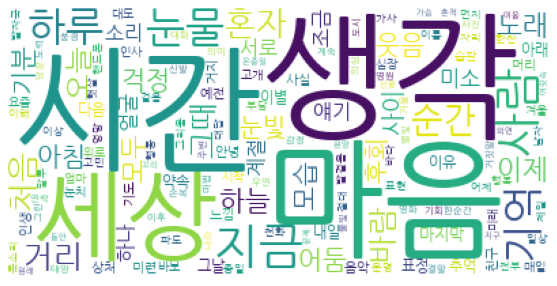

In [99]:
plt.figure(figsize=(15,5))
plt.axis('off')
plt.imshow(cloud)
plt.show()

In [100]:
counts_NP = Counter([j for i in range(len(df_drop)) for j in df_drop['lyrics_NP'][i].split(' ')  if len(j)!= 0 ])
tags_NP = counts_NP.most_common(50)[:]
# 150 단어만 확인해보자

In [101]:
cloud1 = wc.generate_from_frequencies(dict(tags_NP))

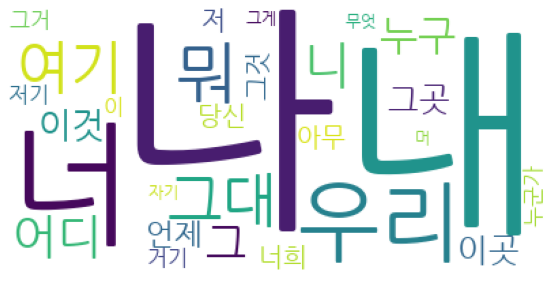

In [102]:
plt.figure(figsize=(15,5))
plt.axis('off')
plt.imshow(cloud1)
plt.show()

In [103]:
counts_NP

Counter({'거기': 2,
         '그': 9,
         '그거': 2,
         '그것': 3,
         '그게': 1,
         '그곳': 5,
         '그대': 17,
         '나': 79,
         '내': 65,
         '너': 63,
         '너희': 3,
         '누구': 8,
         '누군가': 2,
         '니': 12,
         '당신': 3,
         '머': 1,
         '무엇': 1,
         '뭐': 22,
         '아무': 3,
         '어디': 11,
         '언제': 4,
         '여기': 16,
         '우리': 41,
         '이': 2,
         '이것': 6,
         '이곳': 5,
         '자기': 1,
         '저': 3,
         '저기': 2})

In [104]:
!pip install stylecloud

     |████████████████████████████████| 262 kB 8.0 MB/s 
     |████████████████████████████████| 161 kB 54.8 MB/s 
     |████████████████████████████████| 87 kB 6.2 MB/s 
     |████████████████████████████████| 87 kB 8.0 MB/s 
  Created wheel for stylecloud: filename=stylecloud-0.5.2-py3-none-any.whl size=259508 sha256=1c5a59e7608d502e8db7d3640fbc981c9870e8531b06321761a192a744b35a69
  Stored in directory: /root/.cache/pip/wheels/77/42/7a/f52b5f84c04196fd4c2a3dceeb1bbeaee1c93a4fe271b5eb41
  Created wheel for fire: filename=fire-0.4.0-py2.py3-none-any.whl size=115943 sha256=ef6f246e2b6f18eab61acc486f09a47a5130901b6cd514a4e8db7ec1aa764d58
  Stored in directory: /root/.cache/pip/wheels/8a/67/fb/2e8a12fa16661b9d5af1f654bd199366799740a85c64981226
  Created wheel for tinycss: filename=tinycss-0.4-py3-none-any.whl size=43955 sha256=96150f37ef2ca2f82b99d1765d9d32146dd23368f8f1d71570a847bb6b802e2d
  Stored in directory: /root/.cache/pip/wheels/6c/66/e8/e53d7a476011891fa51a5ee83a2d1852b19b258f975

In [105]:
import stylecloud
from PIL import Image

<a href='https://www.joydeepdeb.com/misc/font-awesome-5.html'>스타일클라우드의 이미지 선택</a>

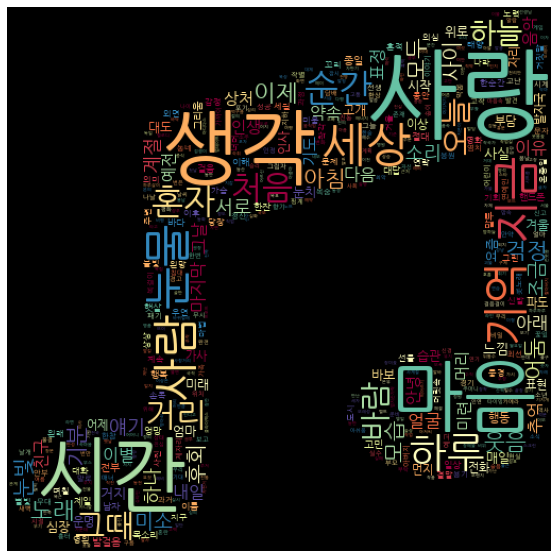

In [106]:
stylecloud.gen_stylecloud(text=counts,font_path='/content/drive/MyDrive/2021_1~6월 멜론차트/NanumGothic.ttf',icon_name='fas fa-music',background_color='black',palette='colorbrewer.diverging.Spectral_11')
image = Image.open('/content/stylecloud.png')
plt.figure(figsize=(15,10))
plt.axis('off')
plt.imshow(image)
plt.show()

In [107]:
# TF-IDF로 단어 가중치 계산
from sklearn.feature_extraction.text import TfidfVectorizer

In [108]:
tf = TfidfVectorizer()

In [109]:
tdm = tf.fit_transform(temp)

In [110]:
word_count = pd.DataFrame({
    'word': tf.get_feature_names(),
    'frequency': tdm.sum(axis=0).flat
})

In [111]:
word_count.sort_values('frequency',ascending=False).head(20)
#전체 달에 관한 단어별 빈도

,word,frequency
376,사랑,49.0
397,생각,33.0
453,시간,31.0
217,마음,29.0
411,세상,23.0
375,사람,22.0
720,지금,22.0
152,눈물,21.0
107,기억,21.0
818,하루,20.0


In [112]:
tdm = tf.fit_transform([j for i in range(len(df_drop)) for j in df_drop['lyrics_NP'][i].split(' ')  if len(j)!= 0 ])

In [113]:
word_count = pd.DataFrame({
    'word': tf.get_feature_names(),
    'frequency': tdm.sum(axis=0).flat
})

In [114]:
word_count.sort_values('frequency',ascending=False).head(20)
#전체 달에 관한 단어별 빈도

,word,frequency
15,우리,41.0
5,그대,17.0
14,여기,16.0
12,어디,11.0
7,누구,8.0
16,이것,6.0
17,이곳,5.0
4,그곳,5.0
13,언제,4.0
2,그것,3.0


In [115]:
word_count[word_count['word']=='누구']

,word,frequency
7,누구,8.0


In [116]:
len(word_count)

20

In [117]:
from sklearn.metrics.pairwise import linear_kernel
from mlxtend.preprocessing import TransactionEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

콘텐츠 기반 필터링

<a href= 'https://www.mk.co.kr/news/it/view/2020/05/459416/'>"이 노래 추천해요"…음악플랫폼, AI 기술전쟁</a>

In [118]:
cv = CountVectorizer()

In [119]:
cv_df = cv.fit_transform(df_drop['lyric_nouns'])

In [120]:
cv_df.toarray()

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [121]:
cv_df = pd.DataFrame(cv_df.toarray(),columns=cv.vocabulary_)

In [122]:
cv_df

,빌딩,고개,이천,가난,계속,에너지,수직,경기,연예인,멜로디,타고,콧노래,목걸이,허리,겁쟁이,아침,아버지,팔찌,행동,벨트,알바,내일,작업실,술상,라면,나라,카니발,함성,발사,고난,부정,성공,뒤통수,지금,응원,장착,기회,시급,걱정,술병,...,민트,지도,은하수,가방,칵테일,밤새,운동화,야경,레몬,달빛,감옥,내색,슬픔,신호,분리,무기,절망,야수,감당,파괴,위협,중심,비난,광야,유혹,시련,결속,환각,믿음,진해,설명,보통,변덕,유리,도수,모금,여름밤,치맛바람,내숭,바닷가
0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
91,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [123]:
cosine_similarity(cv_df,cv_df)

array([[1.        , 0.02752409, 0.        , ..., 0.02644429, 0.02874798,
        0.05504819],
       [0.02752409, 1.        , 0.        , ..., 0.08006408, 0.08703883,
        0.16666667],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.02644429, 0.08006408, 0.        , ..., 1.        , 0.2508726 ,
        0.16012815],
       [0.02874798, 0.08703883, 0.        , ..., 0.2508726 , 1.        ,
        0.08703883],
       [0.05504819, 0.16666667, 0.        , ..., 0.16012815, 0.08703883,
        1.        ]])

In [124]:
args_cosine = cosine_similarity(cv_df,cv_df).argsort()[:,::-1]
args_cosine

array([[ 0, 26, 20, ...,  2, 50, 61],
       [ 1, 10, 89, ..., 42, 48, 23],
       [93, 34, 25, ..., 66, 67,  0],
       ...,
       [91, 59, 92, ..., 36, 31, 46],
       [92, 91, 53, ..., 24, 36, 46],
       [93, 54, 44, ..., 68, 63, 29]])

In [125]:
args_cosine[0][:11]

array([ 0, 26, 20, 10, 72,  9,  6,  8, 27, 78, 57])

코사인 유사도를 대칭행렬로 구해준 다음 argsort를 사용하여 데이터의 index로 반환

In [126]:
def find_sim_music(df, sorted_ind, title_name, top_n=10):
    
    title_music = df[df['title'] == title_name]
    
    title_index = title_music.index.values
    similar_indexes = sorted_ind[title_index, :(top_n+1)]
    
    similar_indexes = similar_indexes.reshape(-1)
    return df.iloc[similar_indexes][:]

In [127]:
similar_music = find_sim_music(df_drop, args_cosine, 'VVS (Feat. JUSTHIS) (Prod. GroovyRoom)')
similar_music[['title','artist','rating','vote_count','lyric_nouns']]

,title,artist,rating,vote_count,lyric_nouns
0,VVS (Feat. JUSTHIS) (Prod. GroovyRoom),"미란이 (Mirani), 먼치맨(MUNCHMAN), Khundi Panda, 머쉬베...",3.9,17116,빌딩 고개 이천 가난 계속 에너지 수직 경기 연예인 멜로디 타고 콧노래 목걸이 허리...
26,Freak (Prod. Slom),"릴보이 (lIlBOI), 원슈타인, Chillin Homie, 스카이민혁 (Skym...",3.9,17116,거리 연락 필수 얘기 도시 불빛 아줌마 반대 시트콤 고장 어르신 진짜 패기 레비 사...
20,"Achoo (Feat. pH-1, HAON) (Prod. GroovyRoom)",미란이 (Mirani),4.5,10807,거리 용납 진동 어린이 진통 처지 앞길 이제 반성 권장 직진 이모 숫자 아디다스 신...
10,내 마음이 움찔했던 순간 (취향저격 그녀 X 규현),규현 (KYUHYUN),4.2,3647,종일 사랑 지금 생각 표현 마음 하루 처음 그때 소리 한순간 이제 용기 부담 매일 ...
72,아이와 나의 바다,아이유,4.7,40423,흔적 두려움 습관 소원 이제 목소리 화해 대답 의심 아이 시간 동안 세상 얼굴 내일...
9,오래된 노래,스탠딩 에그,4.0,4080,거리 운명 사랑 발걸음 생각 지금 우연 노래 모습 예전
6,힘든 건 사랑이 아니다,임창정,4.0,8064,염치 제자리 사랑 지금 그늘 세상
8,Life Goes On,방탄소년단,4.4,42522,거리 말로 발자국 시작 먹구름 감기 겨울 오늘 시간 덕분 세상 내일 먼지 하루 눈치...
27,사실 나는 (Feat.전건호),경서예지,1.6,5787,후회 노력 사랑 생각 행동 마음 당장 사람 상처 절대 시간 사실 세상
78,라라라,SG 워너비,4.7,4849,세월 어깨 내사 사랑 나라 별빛 세찬 마음 자신 노래 바람 평생 세상


lyric의 단어들이 유사한 음악

가중평균(Wighted Rating) = (v/(v+m)) * R +(m/(v+m)) * C


- v: 개별 평점을 투표한 횟수
- m : 평점을 부여하기 위한 최소 투표 횟수
- R : 개별 평균 평점
- C : 전체 평점

In [128]:
C = df_drop['rating'].mean()
m = df_drop['vote_count'].quantile(0.75)
print(C,m)

3.9010638297872333 26029.75


In [129]:
df_drop['weight_rating'] = (df_drop['vote_count']/(df_drop['vote_count']+m))*(df_drop['rating'])+(m/(df_drop['vote_count']+m))*C

In [130]:
df_drop

,month,ranking,title,artist,like,lyric,genre,date,rating,vote_count,genre_label,artist_label,title_label,lyric_nouns,lyrics_NP,weight_rating
0,1,1,VVS (Feat. JUSTHIS) (Prod. GroovyRoom),"미란이 (Mirani), 먼치맨(MUNCHMAN), Khundi Panda, 머쉬베...",186565,보여줘야겠어 내가 망할 거랬던 놈들에게도 내가 잘될 거라 했던 너에게도 다 할게 최...,랩/힙합,2020.11,3.9,17116,2,28,27,빌딩 고개 이천 가난 계속 에너지 수직 경기 연예인 멜로디 타고 콧노래 목걸이 허리...,여기 너 뭐 나 그거 내,3.900642
1,1,2,밤하늘의 별을(2020),경서,156404,밤하늘의 별을 따서 너에게 줄래 너는 내가 사랑하니까 더 소중하니까 오직 너 아니면...,발라드,2020.11,1.2,28059,4,15,54,만난 순간 사랑 표현 처음 마음 사람 대도 이제 웃음 혼자 밤하늘,니 나 너 내,2.499864
2,1,3,Dynamite,방탄소년단,416020,Cos ah ah I’m in the stars tonight So watch me...,댄스,2020.08,4.0,60557,1,30,11,,,3.970258
3,1,4,잠이 오질 않네요,장범준,142252,당신은 날 설레게 만들어 조용한 내 마음 자꾸만 춤추게 해 얼마나 얼마나 날 떨리게...,발라드,2020.10,4.2,6036,4,49,82,심장 생각 마음 오늘 매일,그대 너 그 나 내 당신,3.957335
4,1,5,Lovesick Girls,BLACKPINK,193633,영원한 밤 창문 없는 방에 우릴 가둔 love What can we say 매번 아...,댄스,2020.10,4.1,23390,1,5,21,눈빛 끝장 보기 사랑 일지 아픔 의미 창문 잠깐 상처 세상 눈물,나 너 내,3.995219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,5,49,너의 발걸음에 빛을 비춰줄게 (Prod. 조영수),케이시 (Kassy),27468,언제나 너의 곁에 있어 줄게 눈부시게 빛나 모든 날들이 세상 모두가 변한다 해도 변...,발라드,2021.04,3.5,1653,4,56,40,변덕 사랑 어둠 발걸음 지금 마음 사람 혼자 모두 세상 눈물,그대 나 너 내,3.877115
90,6,12,안녕 (Hello),조이 (JOY),85115,외로운 날들이여 모두 다 안녕 내 마음속의 눈물들도 이제는 안녕 Oh 어제의 너는 ...,록/메탈,2021.05,4.5,12176,3,53,70,후회 이제 햇살 웃음 하늘 미련 아침 오늘 마음속 모습 세상 눈물 어제 이상 거울 ...,어디 니 너 내,4.091942
91,6,20,Alcohol-Free,TWICE (트와이스),58443,너와 있을 땐 내게 신기한 변화가 있는데 자꾸 미소 짓게 돼 아무 일도 없는데 자...,댄스,2021.06,3.6,12432,1,12,2,심장 도수 눈빛 모금 사랑 미소 생각 기분 마법 소리 완전 변화 이름,뭐 나 너 내,3.803751
92,6,22,치맛바람 (Chi Mat Ba Ram),브레이브걸스,78890,"You know what it is B. girls are back, Brave S...",댄스,2021.06,4.3,14189,1,33,86,여름밤 눈빛 치맛바람 사랑 햇살 기분 내숭 눈치 오늘 바닷가 바람,나 너 내,4.041807


In [131]:
def find_sim_music(df, sorted_ind, title_name, top_n=10):
    title_music = df[df['title'] == title_name]
    title_index = title_music.index.values
    
    similar_indexes = sorted_ind[title_index, :(top_n*2)]
    similar_indexes = similar_indexes.reshape(-1)

    similar_indexes = similar_indexes[similar_indexes != title_index]
    
    return df.iloc[similar_indexes].sort_values('weight_rating', ascending=False)[:top_n]

similar_music = find_sim_music(df_drop,args_cosine, 'VVS (Feat. JUSTHIS) (Prod. GroovyRoom)',10)
similar_music[['title','artist', 'rating', 'weight_rating','lyric_nouns']]

,title,artist,rating,weight_rating,lyric_nouns
67,Coin,아이유,4.7,4.387054,후회 목숨 게임 신세계 구걸 눈빛 경기 엉망 최악 지금 테이블 마지막 승리 원래 실...
72,아이와 나의 바다,아이유,4.7,4.387054,흔적 두려움 습관 소원 이제 목소리 화해 대답 의심 아이 시간 동안 세상 얼굴 내일...
57,Love poem,아이유,4.6,4.341834,고개 시가 사랑 잠시 마음 기도 목소리 그날 소리 절대 노래 자리 기억 세상 눈물
8,Life Goes On,방탄소년단,4.4,4.210549,거리 말로 발자국 시작 먹구름 감기 겨울 오늘 시간 덕분 세상 내일 먼지 하루 눈치...
90,안녕 (Hello),조이 (JOY),4.5,4.091942,후회 이제 햇살 웃음 하늘 미련 아침 오늘 마음속 모습 세상 눈물 어제 이상 거울 ...
20,"Achoo (Feat. pH-1, HAON) (Prod. GroovyRoom)",미란이 (Mirani),4.5,4.076777,거리 용납 진동 어린이 진통 처지 앞길 이제 반성 권장 직진 이모 숫자 아디다스 신...
7,"내일이 오면 (Feat. 기리보이, BIG Naughty (서동현))",릴보이 (lIlBOI),4.5,4.076777,후회 지하 연락 안부 모두 얘기 생각 감동 당장 옛날 어른 신발 바퀴벌레 겨울 친구...
78,라라라,SG 워너비,4.7,4.026524,세월 어깨 내사 사랑 나라 별빛 세찬 마음 자신 노래 바람 평생 세상
88,헤픈 우연,헤이즈 (Heize),4.4,4.002884,습관 생각 서로 만약 우연 그날 시간 세상 고통 운명 이별 설명 처음 그때 마음 보...
43,악역 (Feat. 이하이 & 사이먼 도미닉) (Prod. 코드 쿤스트),스윙스,4.6,3.987039,담당 전봇대 나로 과거 대부분 문제 부탁 연예인 영화 저장 싸가지 선생 가족 전직 ...


In [132]:
!pip install surprise

     |████████████████████████████████| 11.8 MB 53 kB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1617768 sha256=f5802d938fac7990a73cb6fb05548eeab2268c1a39e971edbd6e62c381bb85e8
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [133]:
import surprise
from surprise import Reader,SVD,accuracy
from surprise.model_selection import KFold,GridSearchCV,cross_validate,train_test_split

참조 

https://dschloe.github.io/python/recommendation/recommendation_02/

https://eda-ai-lab.tistory.com/528

http://hoondongkim.blogspot.com/2019/03/recommendation-trend.html

In [134]:
# 데이터 변환
rd = Reader()
data = surprise.Dataset.load_from_df(df_drop[['title','artist','rating']],rd)

In [135]:
trainset, testset = train_test_split(data,random_state=42)

In [136]:
# SVD 학습
algo = SVD()
algo.fit(trainset)

In [137]:
predictset = algo.test(testset)
predictset[:5]

[Prediction(uid='Gone', iid='로제 (ROSÉ)', r_ui=4.4, est=3.9099024855232187, details={'was_impossible': False}),
 Prediction(uid='Dun Dun Dance', iid='오마이걸 (OH MY GIRL)', r_ui=4.0, est=3.892311078834904, details={'was_impossible': False}),
 Prediction(uid="DON'T TOUCH ME", iid='환불원정대', r_ui=4.3, est=3.8773333333333335, details={'was_impossible': False}),
 Prediction(uid='Dolphin', iid='오마이걸 (OH MY GIRL)', r_ui=4.0, est=3.892311078834904, details={'was_impossible': False}),
 Prediction(uid='밤하늘의 별을(2020)', iid='경서', r_ui=1.2, est=3.8773333333333335, details={'was_impossible': False})]

In [138]:
accuracy.rmse(predictset)

RMSE: 0.9642


0.9642486800245598

In [139]:
!pip install fbprophet

월 별 단어별로 가중치를 준 후 시계열 분석으로 다음 달에 자주 등장하는 단어들을 맞출 수 있을까?

참조 

https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=vangarang&logNo=221072014624

https://www.python2.net/questions-426339.htm

https://medium.com/spikelab/forecasting-multiples-time-series-using-prophet-in-parallel-2515abd1a245

In [140]:
df_drop
# df 드랍의 월 별 가중치를 tf-idf로 구해 줄 예정

,month,ranking,title,artist,like,lyric,genre,date,rating,vote_count,genre_label,artist_label,title_label,lyric_nouns,lyrics_NP,weight_rating
0,1,1,VVS (Feat. JUSTHIS) (Prod. GroovyRoom),"미란이 (Mirani), 먼치맨(MUNCHMAN), Khundi Panda, 머쉬베...",186565,보여줘야겠어 내가 망할 거랬던 놈들에게도 내가 잘될 거라 했던 너에게도 다 할게 최...,랩/힙합,2020.11,3.9,17116,2,28,27,빌딩 고개 이천 가난 계속 에너지 수직 경기 연예인 멜로디 타고 콧노래 목걸이 허리...,여기 너 뭐 나 그거 내,3.900642
1,1,2,밤하늘의 별을(2020),경서,156404,밤하늘의 별을 따서 너에게 줄래 너는 내가 사랑하니까 더 소중하니까 오직 너 아니면...,발라드,2020.11,1.2,28059,4,15,54,만난 순간 사랑 표현 처음 마음 사람 대도 이제 웃음 혼자 밤하늘,니 나 너 내,2.499864
2,1,3,Dynamite,방탄소년단,416020,Cos ah ah I’m in the stars tonight So watch me...,댄스,2020.08,4.0,60557,1,30,11,,,3.970258
3,1,4,잠이 오질 않네요,장범준,142252,당신은 날 설레게 만들어 조용한 내 마음 자꾸만 춤추게 해 얼마나 얼마나 날 떨리게...,발라드,2020.10,4.2,6036,4,49,82,심장 생각 마음 오늘 매일,그대 너 그 나 내 당신,3.957335
4,1,5,Lovesick Girls,BLACKPINK,193633,영원한 밤 창문 없는 방에 우릴 가둔 love What can we say 매번 아...,댄스,2020.10,4.1,23390,1,5,21,눈빛 끝장 보기 사랑 일지 아픔 의미 창문 잠깐 상처 세상 눈물,나 너 내,3.995219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,5,49,너의 발걸음에 빛을 비춰줄게 (Prod. 조영수),케이시 (Kassy),27468,언제나 너의 곁에 있어 줄게 눈부시게 빛나 모든 날들이 세상 모두가 변한다 해도 변...,발라드,2021.04,3.5,1653,4,56,40,변덕 사랑 어둠 발걸음 지금 마음 사람 혼자 모두 세상 눈물,그대 나 너 내,3.877115
90,6,12,안녕 (Hello),조이 (JOY),85115,외로운 날들이여 모두 다 안녕 내 마음속의 눈물들도 이제는 안녕 Oh 어제의 너는 ...,록/메탈,2021.05,4.5,12176,3,53,70,후회 이제 햇살 웃음 하늘 미련 아침 오늘 마음속 모습 세상 눈물 어제 이상 거울 ...,어디 니 너 내,4.091942
91,6,20,Alcohol-Free,TWICE (트와이스),58443,너와 있을 땐 내게 신기한 변화가 있는데 자꾸 미소 짓게 돼 아무 일도 없는데 자...,댄스,2021.06,3.6,12432,1,12,2,심장 도수 눈빛 모금 사랑 미소 생각 기분 마법 소리 완전 변화 이름,뭐 나 너 내,3.803751
92,6,22,치맛바람 (Chi Mat Ba Ram),브레이브걸스,78890,"You know what it is B. girls are back, Brave S...",댄스,2021.06,4.3,14189,1,33,86,여름밤 눈빛 치맛바람 사랑 햇살 기분 내숭 눈치 오늘 바닷가 바람,나 너 내,4.041807


In [141]:
df_drop[df_drop['month']==1]['lyric_nouns']

0     빌딩 고개 이천 가난 계속 에너지 수직 경기 연예인 멜로디 타고 콧노래 목걸이 허리...
1                  만난 순간 사랑 표현 처음 마음 사람 대도 이제 웃음 혼자 밤하늘
2                                                      
3                                        심장 생각 마음 오늘 매일
4                   눈빛 끝장 보기 사랑 일지 아픔 의미 창문 잠깐 상처 세상 눈물
5     후회 거리 습관 생각 주저 인사 아침 취기 고백 오늘 쓴웃음 부담 순간 문자 연습 ...
6                                    염치 제자리 사랑 지금 그늘 세상
7     후회 지하 연락 안부 모두 얘기 생각 감동 당장 옛날 어른 신발 바퀴벌레 겨울 친구...
8     거리 말로 발자국 시작 먹구름 감기 겨울 오늘 시간 덕분 세상 내일 먼지 하루 눈치...
9                        거리 운명 사랑 발걸음 생각 지금 우연 노래 모습 예전
10    종일 사랑 지금 생각 표현 마음 하루 처음 그때 소리 한순간 이제 용기 부담 매일 ...
11    위로 고작 추억 결말 태양 인사 서로 모래성 영원 아침 여행 시간 그리움 이별 이야...
12                              내일 순간 바람 생각 마음 부담 가을 산책
13    기준 침대 생각 대도 웃음꽃 신발 조금 요즘 선생님 영화 전부 모드 친구 가족 주변...
14    거리 가운데 발자국 대화 서로 적막 걸음 이후 포기 바다 이별 거지 그때 혼자 사이...
15                     위로 새벽 감성 음악 감정 생각 마음 소리 이해 혼자 눈물
16                    거리 연락 근처 보고 샴푸 지금 생각 핸드폰 마음 사람 계절
17                 움직임 하늘 인생 골반 생각 지금 전율 마음 마법 서

In [142]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [143]:
tfvect = TfidfVectorizer()

In [144]:
(tfvect.fit_transform(df_drop[df_drop['month']==1]['lyric_nouns']).toarray())[0]

array([0.        , 0.10180974, 0.        , 0.08516089, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.06086303, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.0631523 , 0.        , 0.        ,
       0.        , 0.        , 0.10180974, 0.        , 0.        ,
       0.        , 0.        , 0.10180974, 0.        , 0.10180974,
       0.        , 0.        , 0.09207079, 0.10180974, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.09207079, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.10180974, 0.10180974, 0.        , 0.        , 0.10180974,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [145]:
tfvect.vocabulary_

{'가까이': 0,
 '가난': 1,
 '가능': 2,
 '가사': 3,
 '가슴': 4,
 '가시': 5,
 '가운데': 6,
 '가을': 7,
 '가족': 8,
 '가지': 9,
 '가짜': 10,
 '가해': 11,
 '각오': 12,
 '갈래': 13,
 '감기': 14,
 '감동': 15,
 '감성': 16,
 '감시': 17,
 '감정': 18,
 '거대': 19,
 '거름': 20,
 '거리': 21,
 '거울': 22,
 '거절': 23,
 '거지': 24,
 '거짓': 25,
 '거짓말': 26,
 '걱정': 27,
 '건강': 28,
 '건너편': 29,
 '걸음': 30,
 '걸음걸이': 31,
 '겁쟁이': 32,
 '게임': 33,
 '겨울': 34,
 '결말': 35,
 '경고': 36,
 '경기': 37,
 '경례': 38,
 '계속': 39,
 '계절': 40,
 '계획': 41,
 '고개': 42,
 '고난': 43,
 '고단': 44,
 '고민': 45,
 '고백': 46,
 '고작': 47,
 '고장': 48,
 '골목': 49,
 '골반': 50,
 '골칫거리': 51,
 '공부': 52,
 '과거': 53,
 '과정': 54,
 '관계': 55,
 '관심사': 56,
 '괴물': 57,
 '교회': 58,
 '구름': 59,
 '구제': 60,
 '국보': 61,
 '국적': 62,
 '권장': 63,
 '권투': 64,
 '그날': 65,
 '그늘': 66,
 '그때': 67,
 '그레이': 68,
 '그리움': 69,
 '그린': 70,
 '그림': 71,
 '그림자': 72,
 '근처': 73,
 '글자': 74,
 '기도': 75,
 '기만': 76,
 '기분': 77,
 '기쁨': 78,
 '기약': 79,
 '기억': 80,
 '기원': 81,
 '기준': 82,
 '기지개': 83,
 '기회': 84,
 '꼬리': 85,
 '꽃잎': 86,
 '끝장': 87,
 '나날': 88,
 '나라': 89,
 '나로':

In [146]:
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict

temp_vect = []
sp_matrix = tfvect.fit_transform(df_drop[df_drop['month']==1]['lyric_nouns'])

word2id = defaultdict(lambda : 0)
for idx, feature in enumerate(tfvect.get_feature_names()):
    word2id[feature] = idx

for i, sent in enumerate(df_drop[df_drop['month']==1]['lyric_nouns']):
    temp_vect.append([ (token, sp_matrix[i, word2id[token]]) for token in sent.split() ])

In [147]:
temp_vect[0][0]

('빌딩', 0.10180974211655101)

In [148]:
sum(tfvect.fit_transform(df_drop[df_drop['month']==1]['lyric_nouns']).toarray())/50

array([0.00293459, 0.00203619, 0.00282348, 0.00744555, 0.01118835,
       0.0035529 , 0.00532679, 0.00935645, 0.00592349, 0.00684995,
       0.00301988, 0.00451077, 0.00746824, 0.00451077, 0.00513002,
       0.0035529 , 0.00755149, 0.00695086, 0.01298618, 0.00332368,
       0.00568931, 0.03030344, 0.00332368, 0.00282348, 0.01285166,
       0.00245708, 0.01104227, 0.02755098, 0.00282348, 0.00695086,
       0.01341597, 0.00853299, 0.00203619, 0.00451077, 0.01429166,
       0.00450226, 0.00332368, 0.00203619, 0.00282348, 0.00203619,
       0.02543288, 0.00245708, 0.0058526 , 0.00203619, 0.00624135,
       0.00786321, 0.00551221, 0.00450226, 0.00293459, 0.00574358,
       0.00727974, 0.00443547, 0.00293459, 0.00457242, 0.00937009,
       0.00421091, 0.0050001 , 0.00332368, 0.00301988, 0.00282348,
       0.00203619, 0.00203619, 0.00295761, 0.00295761, 0.00203619,
       0.01239815, 0.01537195, 0.03283205, 0.00282348, 0.01322347,
       0.00666505, 0.00282348, 0.00450226, 0.00789631, 0.00421

In [149]:
len(tfvect.fit_transform(df_drop[df_drop['month']==1]['lyric_nouns']).toarray())

50

In [150]:
tf_df_1 = pd.DataFrame((sum(tfvect.fit_transform(df_drop[df_drop['month']==1]['lyric_nouns']).toarray())/50).reshape(1,-1),columns=tfvect.vocabulary_)
tf_df_2 = pd.DataFrame((sum(tfvect.fit_transform(df_drop[df_drop['month']==2]['lyric_nouns']).toarray())/9).reshape(1,-1),columns=tfvect.vocabulary_)
tf_df_3 = pd.DataFrame((sum(tfvect.fit_transform(df_drop[df_drop['month']==3]['lyric_nouns']).toarray())/8).reshape(1,-1),columns=tfvect.vocabulary_)
tf_df_4 = pd.DataFrame((sum(tfvect.fit_transform(df_drop[df_drop['month']==4]['lyric_nouns']).toarray())/12).reshape(1,-1),columns=tfvect.vocabulary_)
tf_df_5 = pd.DataFrame((sum(tfvect.fit_transform(df_drop[df_drop['month']==5]['lyric_nouns']).toarray())/11).reshape(1,-1),columns=tfvect.vocabulary_)
tf_df_6 = pd.DataFrame((sum(tfvect.fit_transform(df_drop[df_drop['month']==6]['lyric_nouns']).toarray())/4).reshape(1,-1),columns=tfvect.vocabulary_)

In [151]:
tf_df_2

,웃음,미소,생각,잠시,별거,오늘,제일,표정,바람,거리,새벽,리듬,염치,지금,관심,기분,사람,상태,말투,살모사,눈치,정신,행동,심장,고개,꿈속,진동,얘기,사랑,핸드폰,며칠,느낌,빈자리,세월,가까이,순간,시간,대도,햇살,외면,...,계절,그리움,술집,행복,날씨,하루,마음,소주,술잔,한잔,국물,전화,일상,훗날,기억,번호,그때,약속,시절,시가,기도,목소리,그날,소리,절대,노래,자리,이후,하나,여름,얼굴,아침,배려,식탁,서로,이해,사이,변화,별것,대답
0,0.035087,0.035087,0.031787,0.033385,0.023864,0.054494,0.033385,0.031787,0.023864,0.031808,0.037715,0.023864,0.031808,0.047004,0.05872,0.032711,0.023864,0.033385,0.031808,0.066651,0.054476,0.032711,0.028316,0.035087,0.031787,0.047022,0.023864,0.06816,0.032711,0.035087,0.033385,0.031808,0.041952,0.065068,0.048354,0.028316,0.037715,0.028316,0.041952,0.028316,...,0.023864,0.023864,0.031808,0.07798,0.037715,0.028316,0.032711,0.052011,0.028316,0.037715,0.059483,0.028316,0.028316,0.031787,0.041952,0.057832,0.063062,0.023864,0.028316,0.028316,0.037715,0.031808,0.062299,0.023864,0.031808,0.031787,0.041952,0.033385,0.023864,0.06816,0.032711,0.07285,0.028316,0.044072,0.023864,0.032711,0.035087,0.031787,0.023864,0.037715


In [152]:
tf_df_3

,후회,눈빛,사랑,미소,생각,온종일,고민,하루,가기,모습,한마디,중요,이제,상상,시작,웃음,사실,하늘,구름,친구,얼굴,거지,처음,기분,느낌,사람,농담,남자,자신,여자,아래,결말,부탁,뜬구름,콧노래,대답,꽃가루,라일락,그날,약속,오늘,눈물,이별,순간,단잠,나리,마음,작별,표정,꽃잎,바람,페이지,지금,봄날,봄바람,안녕,마지막,사이,착각,혼자,흔적,거리,추억,바보,시간,만남,저녁,하나,그림자,미움,기억,고개,신경,꼬리,소리,물음표,세상
0,0.04222,0.031041,0.027989,0.023715,0.045521,0.04222,0.027989,0.045889,0.031041,0.043332,0.031041,0.045521,0.023715,0.023715,0.023715,0.027989,0.027989,0.023715,0.04222,0.027989,0.023715,0.023715,0.023715,0.023715,0.023715,0.058025,0.031041,0.070132,0.045521,0.04222,0.031041,0.023715,0.031041,0.023715,0.023715,0.023715,0.027989,0.121338,0.027989,0.023715,0.027989,0.073223,0.045521,0.045521,0.072519,0.031041,0.027989,0.045521,0.027989,0.023715,0.023715,0.027989,0.027989,0.023715,0.04222,0.027989,0.089799,0.027989,0.027989,0.023715,0.031041,0.027989,0.023715,0.069415,0.043332,0.031041,0.027989,0.023715,0.023715,0.07805,0.031041,0.043332,0.061398,0.04222,0.084189,0.061398,0.031041


In [153]:
tf_df_merge = pd.concat([tf_df_1,tf_df_2,tf_df_3,tf_df_4,tf_df_5,tf_df_6],axis=0)
tf_df_merge

,빌딩,고개,이천,가난,계속,에너지,수직,경기,연예인,멜로디,타고,콧노래,목걸이,허리,겁쟁이,아침,아버지,팔찌,행동,벨트,알바,내일,작업실,술상,라면,나라,카니발,함성,발사,고난,부정,성공,뒤통수,지금,응원,장착,기회,시급,걱정,술병,...,민트,지도,은하수,가방,칵테일,밤새,운동화,야경,레몬,달빛,감옥,내색,슬픔,신호,분리,무기,절망,야수,감당,파괴,위협,중심,비난,광야,유혹,시련,결속,환각,믿음,진해,설명,보통,변덕,유리,도수,모금,여름밤,치맛바람,내숭,바닷가
0,0.002935,0.002036,0.002823,0.007446,0.011188,0.003553,0.005327,0.009356,0.005923,0.00685,0.00302,0.004511,0.007468,0.004511,0.00513,0.003553,0.007551,0.006951,0.012986,0.003324,0.005689,0.030303,0.003324,0.002823,0.012852,0.002457,0.011042,0.027551,0.002823,0.006951,0.013416,0.008533,0.002036,0.004511,0.014292,0.004502,0.003324,0.002036,0.002823,0.002036,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,0.031787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.072850,NaN,NaN,0.028316,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.047004,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,0.043332,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.023715,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.027989,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,0.024439,NaN,NaN,0.021055,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.022138,NaN,NaN,NaN,0.032205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.022138,NaN,NaN,NaN,NaN,0.026076,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,0.016593,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.023296,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.016203,NaN,NaN,NaN,0.016203,NaN,NaN,NaN,NaN,NaN,NaN,...,0.024274,0.017916,0.023296,0.02444,0.019483,0.016203,0.023263,0.016593,0.019483,0.017916,0.023263,0.023296,0.024274,0.023296,0.02444,0.023296,0.016203,0.016203,0.019483,0.017916,0.065187,0.024274,0.016203,0.017916,0.024274,0.034068,0.016203,0.016203,0.016203,0.016203,0.05551,0.030836,0.02444,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.128178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.124447,0.081627,0.055562,0.081627,0.055562,0.076218,0.055562


In [154]:
tf_df_merge = tf_df_merge.fillna(0)
tf_df_merge

,빌딩,고개,이천,가난,계속,에너지,수직,경기,연예인,멜로디,타고,콧노래,목걸이,허리,겁쟁이,아침,아버지,팔찌,행동,벨트,알바,내일,작업실,술상,라면,나라,카니발,함성,발사,고난,부정,성공,뒤통수,지금,응원,장착,기회,시급,걱정,술병,...,민트,지도,은하수,가방,칵테일,밤새,운동화,야경,레몬,달빛,감옥,내색,슬픔,신호,분리,무기,절망,야수,감당,파괴,위협,중심,비난,광야,유혹,시련,결속,환각,믿음,진해,설명,보통,변덕,유리,도수,모금,여름밤,치맛바람,내숭,바닷가
0,0.002935,0.002036,0.002823,0.007446,0.011188,0.003553,0.005327,0.009356,0.005923,0.00685,0.00302,0.004511,0.007468,0.004511,0.00513,0.003553,0.007551,0.006951,0.012986,0.003324,0.005689,0.030303,0.003324,0.002823,0.012852,0.002457,0.011042,0.027551,0.002823,0.006951,0.013416,0.008533,0.002036,0.004511,0.014292,0.004502,0.003324,0.002036,0.002823,0.002036,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0,0.000000,0.031787,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.072850,0.000000,0.000000,0.028316,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.047004,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0,0.000000,0.043332,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.023715,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.027989,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0,0.000000,0.000000,0.000000,0.000000,0.024439,0.000000,0.000000,0.021055,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.022138,0.000000,0.000000,0.000000,0.032205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.022138,0.000000,0.000000,0.000000,0.000000,0.026076,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0,0.000000,0.000000,0.000000,0.000000,0.016593,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.023296,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016203,0.000000,0.000000,0.000000,0.016203,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.024274,0.017916,0.023296,0.02444,0.019483,0.016203,0.023263,0.016593,0.019483,0.017916,0.023263,0.023296,0.024274,0.023296,0.02444,0.023296,0.016203,0.016203,0.019483,0.017916,0.065187,0.024274,0.016203,0.017916,0.024274,0.034068,0.016203,0.016203,0.016203,0.016203,0.05551,0.030836,0.02444,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.128178,

In [155]:
tf_df_merge.index = [str(i)+'{}'.format('월') for i in range(1,7)]
tf_df_merge

,빌딩,고개,이천,가난,계속,에너지,수직,경기,연예인,멜로디,타고,콧노래,목걸이,허리,겁쟁이,아침,아버지,팔찌,행동,벨트,알바,내일,작업실,술상,라면,나라,카니발,함성,발사,고난,부정,성공,뒤통수,지금,응원,장착,기회,시급,걱정,술병,...,민트,지도,은하수,가방,칵테일,밤새,운동화,야경,레몬,달빛,감옥,내색,슬픔,신호,분리,무기,절망,야수,감당,파괴,위협,중심,비난,광야,유혹,시련,결속,환각,믿음,진해,설명,보통,변덕,유리,도수,모금,여름밤,치맛바람,내숭,바닷가
1월,0.002935,0.002036,0.002823,0.007446,0.011188,0.003553,0.005327,0.009356,0.005923,0.00685,0.00302,0.004511,0.007468,0.004511,0.00513,0.003553,0.007551,0.006951,0.012986,0.003324,0.005689,0.030303,0.003324,0.002823,0.012852,0.002457,0.011042,0.027551,0.002823,0.006951,0.013416,0.008533,0.002036,0.004511,0.014292,0.004502,0.003324,0.002036,0.002823,0.002036,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2월,0.000000,0.031787,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.072850,0.000000,0.000000,0.028316,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.047004,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3월,0.000000,0.043332,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.023715,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.027989,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4월,0.000000,0.000000,0.000000,0.000000,0.024439,0.000000,0.000000,0.021055,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.022138,0.000000,0.000000,0.000000,0.032205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.022138,0.000000,0.000000,0.000000,0.000000,0.026076,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5월,0.000000,0.000000,0.000000,0.000000,0.016593,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.023296,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016203,0.000000,0.000000,0.000000,0.016203,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.024274,0.017916,0.023296,0.02444,0.019483,0.016203,0.023263,0.016593,0.019483,0.017916,0.023263,0.023296,0.024274,0.023296,0.02444,0.023296,0.016203,0.016203,0.019483,0.017916,0.065187,0.024274,0.016203,0.017916,0.024274,0.034068,0.016203,0.016203,0.016203,0.016203,0.05551,0.030836,0.02444,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6월,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.1

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48716 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46377 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_

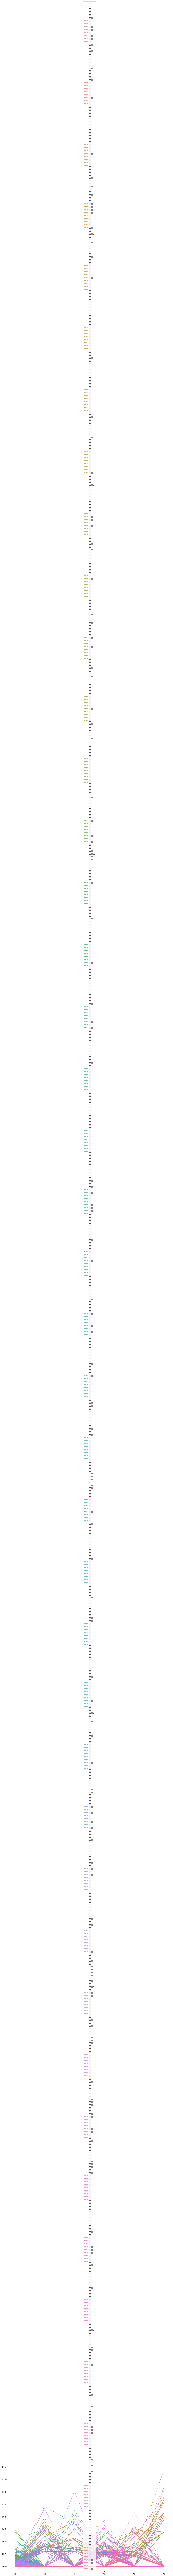

In [156]:
plt.figure(figsize=(15,10))
font_path = '/content/drive/MyDrive/2021_1~6월 멜론차트/NanumGothic.ttf'
font_name = fm.FontProperties(fname=font_path).get_name()
sns.lineplot(data=tf_df_merge)
plt.legend(loc='best')
plt.legend(prop={'family':font_name, 'size':10})
plt.show()

In [205]:
tf_df_merge['ds'] = pd.to_datetime(['2021-01','2021-02','2021-03','2021-04','2021-05','2021-06'],format='%Y%m',errors='ignore')

In [206]:
tf_df_merge

,빌딩,고개,이천,가난,계속,에너지,수직,경기,연예인,멜로디,타고,콧노래,목걸이,허리,겁쟁이,아침,아버지,팔찌,행동,벨트,알바,내일,작업실,술상,라면,나라,카니발,함성,발사,고난,부정,성공,뒤통수,지금,응원,장착,기회,시급,걱정,술병,...,지도,은하수,가방,칵테일,밤새,운동화,야경,레몬,달빛,감옥,내색,슬픔,신호,분리,무기,절망,야수,감당,파괴,위협,중심,비난,광야,유혹,시련,결속,환각,믿음,진해,설명,보통,변덕,유리,도수,모금,여름밤,치맛바람,내숭,바닷가,ds
1월,0.002935,0.002036,0.002823,0.007446,0.011188,0.003553,0.005327,0.009356,0.005923,0.00685,0.00302,0.004511,0.007468,0.004511,0.00513,0.003553,0.007551,0.006951,0.012986,0.003324,0.005689,0.030303,0.003324,0.002823,0.012852,0.002457,0.011042,0.027551,0.002823,0.006951,0.013416,0.008533,0.002036,0.004511,0.014292,0.004502,0.003324,0.002036,0.002823,0.002036,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2021-01
2월,0.000000,0.031787,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.072850,0.000000,0.000000,0.028316,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.047004,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2021-02
3월,0.000000,0.043332,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.023715,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.027989,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2021-03
4월,0.000000,0.000000,0.000000,0.000000,0.024439,0.000000,0.000000,0.021055,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.022138,0.000000,0.000000,0.000000,0.032205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.022138,0.000000,0.000000,0.000000,0.000000,0.026076,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2021-04
5월,0.000000,0.000000,0.000000,0.000000,0.016593,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.023296,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016203,0.000000,0.000000,0.000000,0.016203,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.017916,0.023296,0.02444,0.019483,0.016203,0.023263,0.016593,0.019483,0.017916,0.023263,0.023296,0.024274,0.023296,0.02444,0.023296,0.016203,0.016203,0.019483,0.017916,0.065187,0.024274,0.016203,0.017916,0.024274,0.034068,0.016203,0.016203,0.016203,0.016203,0.05551,0.030836,0.02444,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2021-05
6월,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.128178

In [159]:
from fbprophet import Prophet

In [170]:
tf_df_merge.iloc[:,1:2]

,고개
1월,0.002036
2월,0.031787
3월,0.043332
4월,0.000000
5월,0.000000
6월,0.000000


In [214]:
prophet_temp = []
for i in range(0,870):
  model = Prophet()
  te = []
  temp_concat = pd.concat([tf_df_merge.iloc[:,i:i+1],pd.DataFrame(tf_df_merge['ds'],columns=['ds'])],axis=1).rename(columns={tf_df_merge.columns[i]:'y'})
  model.fit(temp_concat)
  pred_1m = [['2021-07']]
  pred_1m = pd.DataFrame(pred_1m,columns=['ds'])
  pred_1m['ds'] = pd.to_datetime(pred_1m['ds'])
  forecast = model.predict(pred_1m)
  te.append(forecast)
  prophet_temp.append(te)


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disab

In [220]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-07-01,0.037142,0.017612,0.055595,0.037142,0.037142,0.0,0.0,0.0,0.0,0.0,0.0,0.037142


In [247]:
prop_temp = pd.DataFrame(prophet_temp[0][0])
prop_temp

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-07-01,-0.000979,-0.00201,0.000103,-0.000979,-0.000979,0.0,0.0,0.0,0.0,0.0,0.0,-0.000979


In [251]:
for i in range(1,870):
   prop_temp = pd.concat([prop_temp,pd.DataFrame(prophet_temp[i][0])],axis=0)

In [252]:
prop_temp

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-07-01,-0.000979,-0.002010,0.000103,-0.000979,-0.000979,0.0,0.0,0.0,0.0,0.0,0.0,-0.000979
0,2021-07-01,-0.002069,-0.021064,0.017802,-0.002069,-0.002069,0.0,0.0,0.0,0.0,0.0,0.0,-0.002069
0,2021-07-01,-0.000942,-0.001942,0.000052,-0.000942,-0.000942,0.0,0.0,0.0,0.0,0.0,0.0,-0.000942
0,2021-07-01,-0.002483,-0.005107,0.000163,-0.002483,-0.002483,0.0,0.0,0.0,0.0,0.0,0.0,-0.002483
0,2021-07-01,0.010444,-0.002105,0.022415,0.010444,0.010444,0.0,0.0,0.0,0.0,0.0,0.0,0.010444
...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,2021-07-01,0.037142,0.016987,0.055739,0.037142,0.037142,0.0,0.0,0.0,0.0,0.0,0.0,0.037142
0,2021-07-01,0.054566,0.027437,0.083986,0.054566,0.054566,0.0,0.0,0.0,0.0,0.0,0.0,0.054566
0,2021-07-01,0.037142,0.019079,0.055667,0.037142,0.037142,0.0,0.0,0.0,0.0,0.0,0.0,0.037142
0,2021-07-01,0.050950,0.026138,0.077998,0.050950,0.050950,0.0,0.0,0.0,0.0,0.0,0.0,0.050950


In [264]:
pred_yhat = pd.DataFrame(prop_temp['yhat']).T
pred_yhat['ds'] = pd.to_datetime(['2021-07'],format='%Y%m',errors='ignore')
pred_yhat.columns = tf_df_merge.columns
pred_yhat

,빌딩,고개,이천,가난,계속,에너지,수직,경기,연예인,멜로디,타고,콧노래,목걸이,허리,겁쟁이,아침,아버지,팔찌,행동,벨트,알바,내일,작업실,술상,라면,나라,카니발,함성,발사,고난,부정,성공,뒤통수,지금,응원,장착,기회,시급,걱정,술병,...,지도,은하수,가방,칵테일,밤새,운동화,야경,레몬,달빛,감옥,내색,슬픔,신호,분리,무기,절망,야수,감당,파괴,위협,중심,비난,광야,유혹,시련,결속,환각,믿음,진해,설명,보통,변덕,유리,도수,모금,여름밤,치맛바람,내숭,바닷가,ds
yhat,-0.000979,-0.002069,-0.000942,-0.002483,0.010444,-0.001185,-0.001777,0.002374,-0.001976,-0.002285,-0.001007,-0.000077,-0.002491,-0.001505,-0.001711,0.086201,-0.002519,-0.002318,-0.007958,-0.001109,-0.001898,-0.004165,-0.001109,-0.000942,-0.004287,0.007741,-0.003683,-0.00919,-0.000942,0.005213,-0.004475,-0.002846,-0.000679,0.007639,-0.004767,-0.001502,-0.001109,-0.000679,0.005989,-0.000679,...,0.008306,0.0108,0.011331,0.009032,0.007512,0.010785,0.007693,0.009032,0.008306,0.010785,0.0108,0.011254,0.0108,0.011331,0.0108,0.007512,0.007512,0.009032,0.008306,0.030222,0.011254,0.007512,0.008306,0.011254,0.015794,0.007512,0.007512,0.007512,0.007512,0.025735,0.014296,0.011331,0.08319,0.054566,0.037142,0.054566,0.037142,0.05095,0.037142,2021-07


In [268]:
tf_df_merge = pd.concat([tf_df_merge,pred_yhat],axis=0)
tf_df_merge.index = [str(i)+'{}'.format('월') for i in range(1,8)]

In [269]:
tf_df_merge

,빌딩,고개,이천,가난,계속,에너지,수직,경기,연예인,멜로디,타고,콧노래,목걸이,허리,겁쟁이,아침,아버지,팔찌,행동,벨트,알바,내일,작업실,술상,라면,나라,카니발,함성,발사,고난,부정,성공,뒤통수,지금,응원,장착,기회,시급,걱정,술병,...,지도,은하수,가방,칵테일,밤새,운동화,야경,레몬,달빛,감옥,내색,슬픔,신호,분리,무기,절망,야수,감당,파괴,위협,중심,비난,광야,유혹,시련,결속,환각,믿음,진해,설명,보통,변덕,유리,도수,모금,여름밤,치맛바람,내숭,바닷가,ds
1월,0.002935,0.002036,0.002823,0.007446,0.011188,0.003553,0.005327,0.009356,0.005923,0.006850,0.003020,0.004511,0.007468,0.004511,0.005130,0.003553,0.007551,0.006951,0.012986,0.003324,0.005689,0.030303,0.003324,0.002823,0.012852,0.002457,0.011042,0.027551,0.002823,0.006951,0.013416,0.008533,0.002036,0.004511,0.014292,0.004502,0.003324,0.002036,0.002823,0.002036,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2021-01
2월,0.000000,0.031787,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.072850,0.000000,0.000000,0.028316,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.047004,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2021-02
3월,0.000000,0.043332,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.023715,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.027989,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2021-03
4월,0.000000,0.000000,0.000000,0.000000,0.024439,0.000000,0.000000,0.021055,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.022138,0.000000,0.000000,0.000000,0.032205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.022138,0.000000,0.000000,0.000000,0.000000,0.026076,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2021-04
5월,0.000000,0.000000,0.000000,0.000000,0.016593,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.023296,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016203,0.000000,0.000000,0.000000,0.016203,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.017916,0.023296,0.024440,0.019483,0.016203,0.023263,0.016593,0.019483,0.017916,0.023263,0.023296,0.024274,0.023296,0.024440,0.023296,0.016203,0.016203,0.019483,0.017916,0.065187,0.024274,0.016203,0.017916,0.024274,0.034068,0.016203,0.016203,0.016203,0.016203,0.055510,0.030836,0.024440,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2021-05
6월,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 50900 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 48716 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 46377 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 44256 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 44060 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 51060 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 52380 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotli

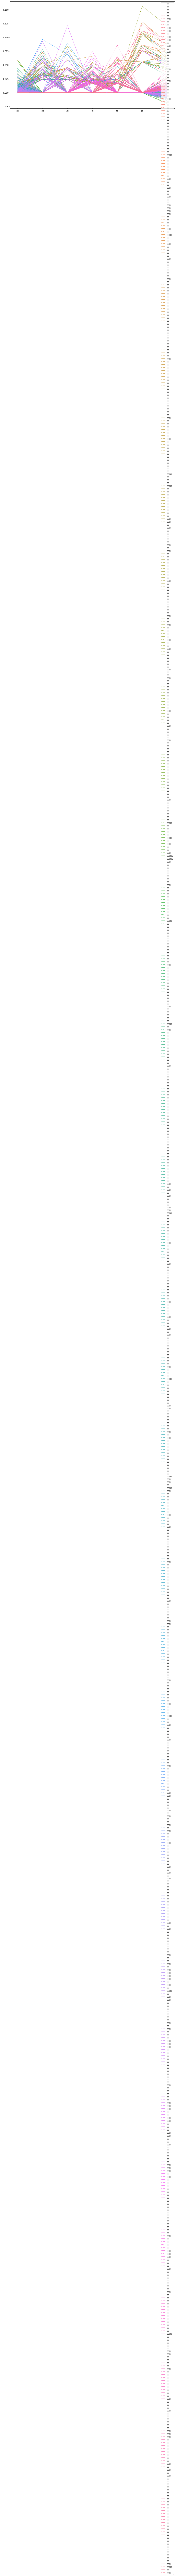

In [271]:
plt.figure(figsize=(15,10))
font_path = '/content/drive/MyDrive/2021_1~6월 멜론차트/NanumGothic.ttf'
font_name = fm.FontProperties(fname=font_path).get_name()
sns.lineplot(data=tf_df_merge)
plt.legend(loc='best')
plt.legend(prop={'family':font_name, 'size':10})
plt.show()